### World Happiness Report Project

Project Description


The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('happiness_score_dataset.csv')

In [3]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

The dataset has both categorical and numerical data

In [4]:
df = df.rename(columns = {'Happiness Rank':'Happiness_Rank',
                          'Happiness Score':'Happiness_Score',
                          'Standard Error':'Standard_Error',
                          'Economy (GDP per Capita)':'GDP_per_Capita',
                          'Health (Life Expectancy)':'Life_Expectancy',
                          'Trust (Government Corruption)':'Government_Corruption',
                          'Dystopia Residual':'Dystopia_Residual'})                        

Renaming the columns

In [5]:
df.head(3)

Country          Region  Happiness_Rank  Happiness_Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   

   Standard_Error  GDP_per_Capita   Family  Life_Expectancy  Freedom  \
0         0.03411         1.39651  1.34951          0.94143  0.66557   
1         0.04884         1.30232  1.40223          0.94784  0.62877   
2         0.03328         1.32548  1.36058          0.87464  0.64938   

   Government_Corruption  Generosity  Dystopia_Residual  
0                0.41978     0.29678            2.51738  
1                0.14145     0.43630            2.70201  
2                0.48357     0.34139            2.49204

In [6]:
df.shape

(158, 12)

We have 158 rows and 12 columns

In [7]:
df.duplicated().sum()

0

Dataset has no duplicates

In [8]:
df.isnull().sum()

Country                  0
Region                   0
Happiness_Rank           0
Happiness_Score          0
Standard_Error           0
GDP_per_Capita           0
Family                   0
Life_Expectancy          0
Freedom                  0
Government_Corruption    0
Generosity               0
Dystopia_Residual        0
dtype: int64

Data has no null values

In [9]:
for columns in ['Country','Region','Happiness_Rank','Happiness_Score','Standard_Error','GDP_per_Capita','Family','Life_Expectancy','Freedom','Government_Corruption','Generosity','Dystopia_Residual']:
    has_blank_spaces =df[columns].apply(lambda x : ' ' in str(x))
    print(f'{columns}: Contain Blank Spaces :{has_blank_spaces.any()}')    


Country: Contain Blank Spaces :True
Region: Contain Blank Spaces :True
Happiness_Rank: Contain Blank Spaces :False
Happiness_Score: Contain Blank Spaces :False
Standard_Error: Contain Blank Spaces :False
GDP_per_Capita: Contain Blank Spaces :False
Family: Contain Blank Spaces :False
Life_Expectancy: Contain Blank Spaces :False
Freedom: Contain Blank Spaces :False
Government_Corruption: Contain Blank Spaces :False
Generosity: Contain Blank Spaces :False
Dystopia_Residual: Contain Blank Spaces :False


Categorical data has blank spaces

In [10]:
df['Country'] = df['Country'].str.replace(r'\s', '', regex=True)
df['Region'] = df['Region'].str.replace(r'\s', '', regex=True)

We removed blank spaces in categorical data using regular expression

In [11]:
for columns in ['Country','Region']:
    has_blank_spaces =df[columns].apply(lambda x : ' ' in str(x))
    print(f'{columns}: Contain Blank Spaces :{has_blank_spaces.any()}')    

Country: Contain Blank Spaces :False
Region: Contain Blank Spaces :False


In [12]:
df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'GDP_per_Capita', 'Family', 'Life_Expectancy',
       'Freedom', 'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

we have 11 columns and one target variable in our dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                158 non-null    object 
 1   Region                 158 non-null    object 
 2   Happiness_Rank         158 non-null    int64  
 3   Happiness_Score        158 non-null    float64
 4   Standard_Error         158 non-null    float64
 5   GDP_per_Capita         158 non-null    float64
 6   Family                 158 non-null    float64
 7   Life_Expectancy        158 non-null    float64
 8   Freedom                158 non-null    float64
 9   Government_Corruption  158 non-null    float64
 10  Generosity             158 non-null    float64
 11  Dystopia_Residual      158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


Our dataset has dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB

In [14]:
df.dtypes

Country                   object
Region                    object
Happiness_Rank             int64
Happiness_Score          float64
Standard_Error           float64
GDP_per_Capita           float64
Family                   float64
Life_Expectancy          float64
Freedom                  float64
Government_Corruption    float64
Generosity               float64
Dystopia_Residual        float64
dtype: object

In [15]:
df.describe()

Happiness_Rank  Happiness_Score  Standard_Error  GDP_per_Capita  \
count      158.000000       158.000000      158.000000      158.000000   
mean        79.493671         5.375734        0.047885        0.846137   
std         45.754363         1.145010        0.017146        0.403121   
min          1.000000         2.839000        0.018480        0.000000   
25%         40.250000         4.526000        0.037268        0.545808   
50%         79.500000         5.232500        0.043940        0.910245   
75%        118.750000         6.243750        0.052300        1.158448   
max        158.000000         7.587000        0.136930        1.690420   

           Family  Life_Expectancy     Freedom  Government_Corruption  \
count  158.000000       158.000000  158.000000             158.000000   
mean     0.991046         0.630259    0.428615               0.143422   
std      0.272369         0.247078    0.150693               0.120034   
min      0.000000         0.000000    0.000000               0.000000   
25%      0.856823         0.439185    0.328330               0.061675   
50%      1.029510         0.696705    0.435515               0.107220   
75%      1.214405         0.811013    0.549092               0.180255   
max      1.402230         1.025250    0.669730               0.551910   

       Generosity  Dystopia_Residual  
count  158.000000         158.000000  
mean     0.237296           2.098977  
std      0.126685           0.553550  
min      0.000000           0.328580  
25%      0.150553           1.759410  
50%      0.216130           2.095415  
75%      0.309883           2.462415  
max      0.795880           3.602140

- The count of each variable is 158 indicates no null values
- The mean and std is reasonbly fair enough so may be distribution of data is sensible
- The mean and median has slight difference so the data may be skewed
- The 3rd quartile and max is fair enough might be dataset has outliers


In [16]:
# Checking for Categorical column
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print('\n')

# Check for numerical column:
numerical_col = []
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)
        

Categorical Columns:  ['Country', 'Region']


Numerical Columns:  ['Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'GDP_per_Capita', 'Family', 'Life_Expectancy', 'Freedom', 'Government_Corruption', 'Generosity', 'Dystopia_Residual']


We clearly identified and separated the data as Categorical and numerical variables

In [17]:
df.nunique().to_frame('No: of unique values')

No: of unique values
Country                                 158
Region                                   10
Happiness_Rank                          157
Happiness_Score                         157
Standard_Error                          153
GDP_per_Capita                          158
Family                                  158
Life_Expectancy                         157
Freedom                                 158
Government_Corruption                   157
Generosity                              158
Dystopia_Residual                       158

We have come to a conclusion of unique values in each variable

In [18]:
for cols in df:
    print(df[cols].value_counts())
    print('\n')

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-SaharanAfrica              40
CentralandEasternEurope        29
LatinAmericaandCaribbean       22
WesternEurope                  21
MiddleEastandNorthernAfrica    20
SoutheasternAsia                9
SouthernAsia                    7
EasternAsia                     6
NorthAmerica                    2
AustraliaandNewZealand          2
Name: count, dtype: int64


Happiness_Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness_Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard_Error
0.03780    2
0.03751    2
0.04394    2
0.

We can find the occurrences of each unique value in the series from value_count() method

### Exploratory Analysis and Visualization

###### Bivariate Analysis

<Axes: xlabel='Region'>

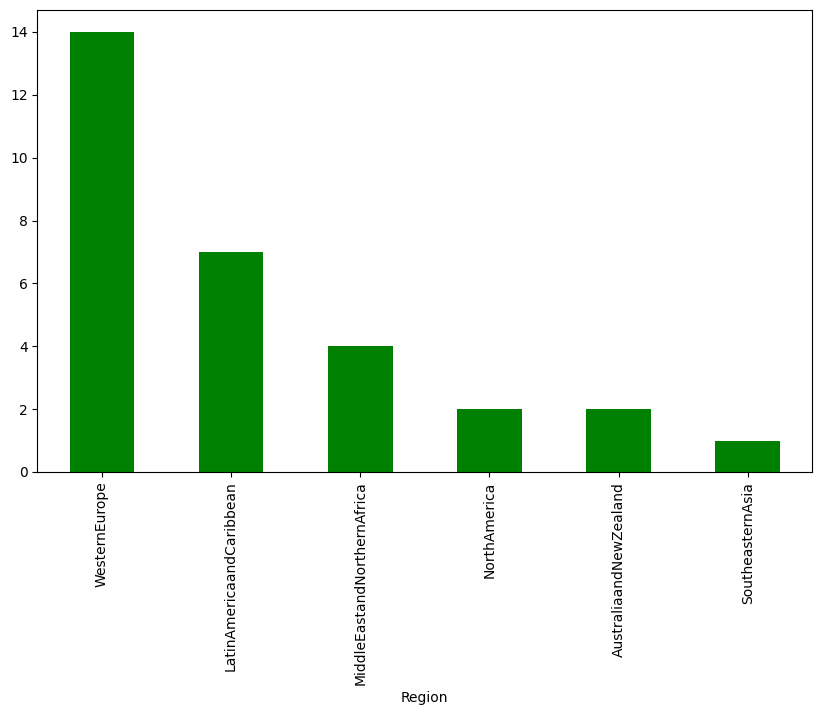

In [19]:
plt.figure(figsize=(10,6))
list = df.sort_values(by=['Happiness_Rank'],ascending=True)['Region'].head(30).value_counts()
list.plot(kind = 'bar', color = 'green')

The barchart illustrates the top 30 regions based on happiness_rank, sorted in ascending order. 
Each region is represented by a green bar, and the height of the bar corresponds to frequency of the region appears within the top 30 rankings.

##### Top 30 regions Happiness_score

<Axes: xlabel='Region'>

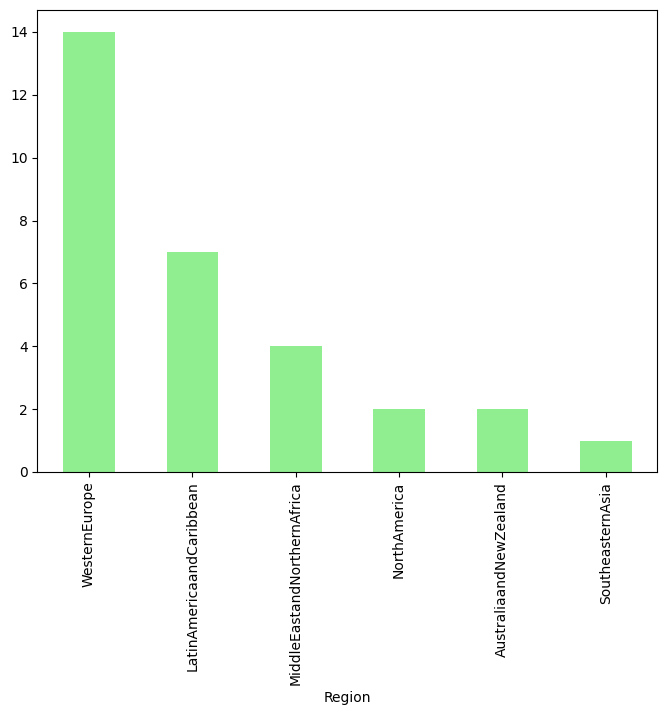

In [20]:
plt.figure(figsize=(8,6))
list = df.sort_values(by=['Happiness_Score'],ascending=False)['Region'].head(30).value_counts()
list.plot(kind = 'bar', color = 'lightgreen')

The barchart illustrates the top 30 regions based on happiness_score, sorted in ascending order. Each region is represented by a green bar, and the height of the bar corresponds to frequency of  the region appears within the top 30 rankings.

##### Bottom 30 regions Happiness_score

<Axes: xlabel='Region'>

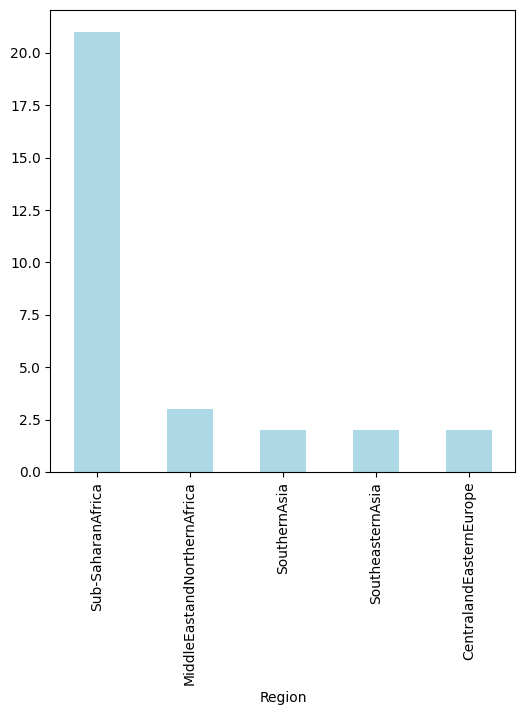

In [21]:
plt.figure(figsize=(6,6))
list = df.sort_values(by=['Happiness_Score'],ascending=True)['Region'].head(30).value_counts()
list.plot(kind = 'bar', color = 'lightblue')

The barchart illustrates the bottom 30 regions based on happiness_score, sorted in ascending order. Each region is represented by a green bar, and the height of the bar corresponds to the frequency of  the region appears within the bottom 30.

##### Lets select top 10 countriess and check its Happiness_Score

In [22]:
df1 = df.head(10).copy()
df1

Country                  Region  Happiness_Rank  Happiness_Score  \
0  Switzerland           WesternEurope               1            7.587   
1      Iceland           WesternEurope               2            7.561   
2      Denmark           WesternEurope               3            7.527   
3       Norway           WesternEurope               4            7.522   
4       Canada            NorthAmerica               5            7.427   
5      Finland           WesternEurope               6            7.406   
6  Netherlands           WesternEurope               7            7.378   
7       Sweden           WesternEurope               8            7.364   
8   NewZealand  AustraliaandNewZealand               9            7.286   
9    Australia  AustraliaandNewZealand              10            7.284   

   Standard_Error  GDP_per_Capita   Family  Life_Expectancy  Freedom  \
0         0.03411         1.39651  1.34951          0.94143  0.66557   
1         0.04884         1.30232  1.40223          0.94784  0.62877   
2         0.03328         1.32548  1.36058          0.87464  0.64938   
3         0.03880         1.45900  1.33095          0.88521  0.66973   
4         0.03553         1.32629  1.32261          0.90563  0.63297   
5         0.03140         1.29025  1.31826          0.88911  0.64169   
6         0.02799         1.32944  1.28017          0.89284  0.61576   
7         0.03157         1.33171  1.28907          0.91087  0.65980   
8         0.03371         1.25018  1.31967          0.90837  0.63938   
9         0.04083         1.33358  1.30923          0.93156  0.65124   

   Government_Corruption  Generosity  Dystopia_Residual  
0                0.41978     0.29678            2.51738  
1                0.14145     0.43630            2.70201  
2                0.48357     0.34139            2.49204  
3                0.36503     0.34699            2.46531  
4                0.32957     0.45811            2.45176  
5                0.41372     0.23351            2.61955  
6                0.31814     0.47610            2.46570  
7                0.43844     0.36262            2.37119  
8                0.42922     0.47501            2.26425  
9                0.35637     0.43562            2.26646

The top 10 countries were tabulated in dataframes showing Switzerland is leading over the listed countries

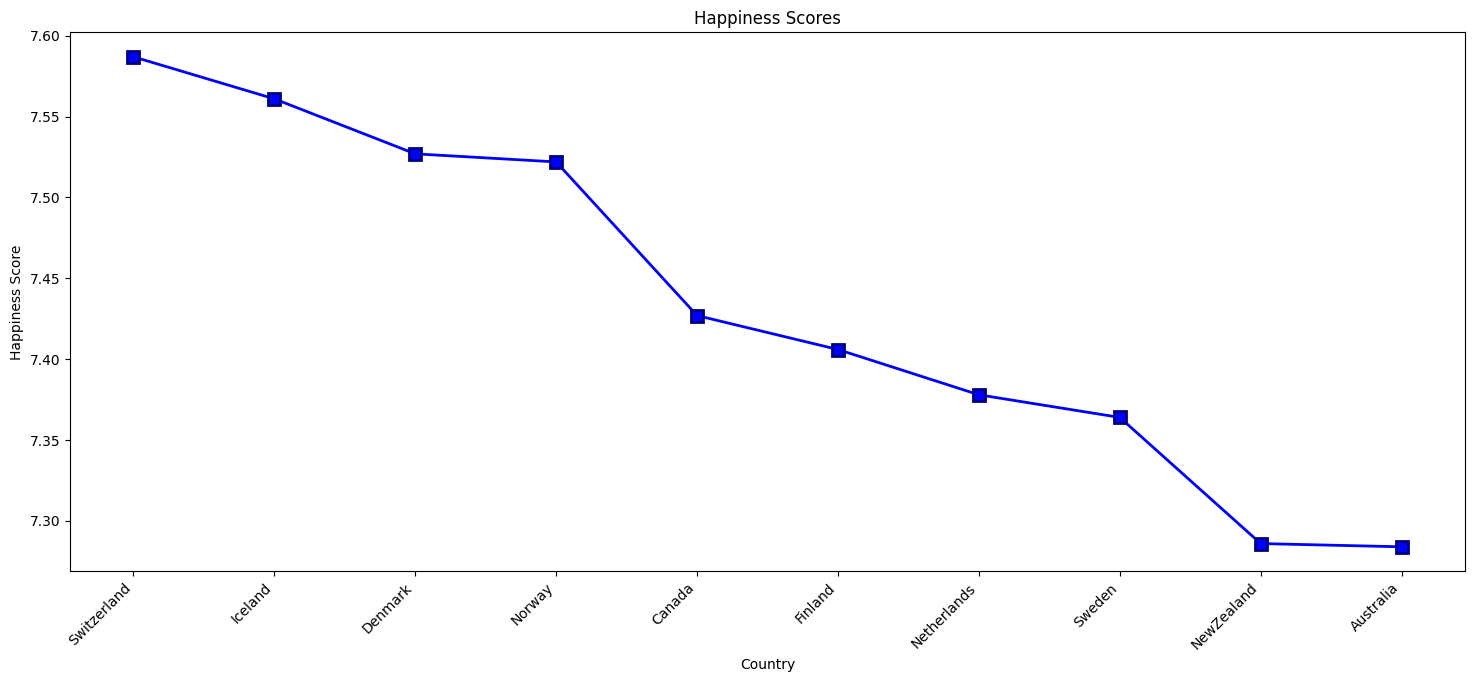

In [23]:
plt.figure(figsize=(18, 7))
scores = df1["Happiness_Score"]
countries = df1["Country"]
plt.plot(scores, marker='s', c='b', ls='-', lw=2, ms=8, mew=2, mec='navy')
plt.xticks(range(10), countries, rotation=45, ha="right")

plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title("Happiness Scores")
plt.show()


The top 10 happy countries found to be from Western Europe Regions and Australia and New Zealand Region

##### Lets select bottom 10 countriess and check its Happiness_Score

In [24]:
df2 = df.tail(10).copy()
df2

Country                       Region  Happiness_Rank  \
148         Chad            Sub-SaharanAfrica             149   
149       Guinea            Sub-SaharanAfrica             150   
150   IvoryCoast            Sub-SaharanAfrica             151   
151  BurkinaFaso            Sub-SaharanAfrica             152   
152  Afghanistan                 SouthernAsia             153   
153       Rwanda            Sub-SaharanAfrica             154   
154        Benin            Sub-SaharanAfrica             155   
155        Syria  MiddleEastandNorthernAfrica             156   
156      Burundi            Sub-SaharanAfrica             157   
157         Togo            Sub-SaharanAfrica             158   

     Happiness_Score  Standard_Error  GDP_per_Capita   Family  \
148            3.667         0.03830         0.34193  0.76062   
149            3.656         0.03590         0.17417  0.46475   
150            3.655         0.05141         0.46534  0.77115   
151            3.587         0.04324         0.25812  0.85188   
152            3.575         0.03084         0.31982  0.30285   
153            3.465         0.03464         0.22208  0.77370   
154            3.340         0.03656         0.28665  0.35386   
155            3.006         0.05015         0.66320  0.47489   
156            2.905         0.08658         0.01530  0.41587   
157            2.839         0.06727         0.20868  0.13995   

     Life_Expectancy  Freedom  Government_Corruption  Generosity  \
148          0.15010  0.23501                0.05269     0.18386   
149          0.24009  0.37725                0.12139     0.28657   
150          0.15185  0.46866                0.17922     0.20165   
151          0.27125  0.39493                0.12832     0.21747   
152          0.30335  0.23414                0.09719     0.36510   
153          0.42864  0.59201                0.55191     0.22628   
154          0.31910  0.48450                0.08010     0.18260   
155          0.72193  0.15684                0.18906     0.47179   
156          0.22396  0.11850                0.10062     0.19727   
157          0.28443  0.36453                0.10731     0.16681   

     Dystopia_Residual  
148            1.94296  
149            1.99172  
150            1.41723  
151            1.46494  
152            1.95210  
153            0.67042  
154            1.63328  
155            0.32858  
156            1.83302  
157            1.56726

The bottom 10 countries were tabulated facing Dystopia and Togo was at the bottom first sadly

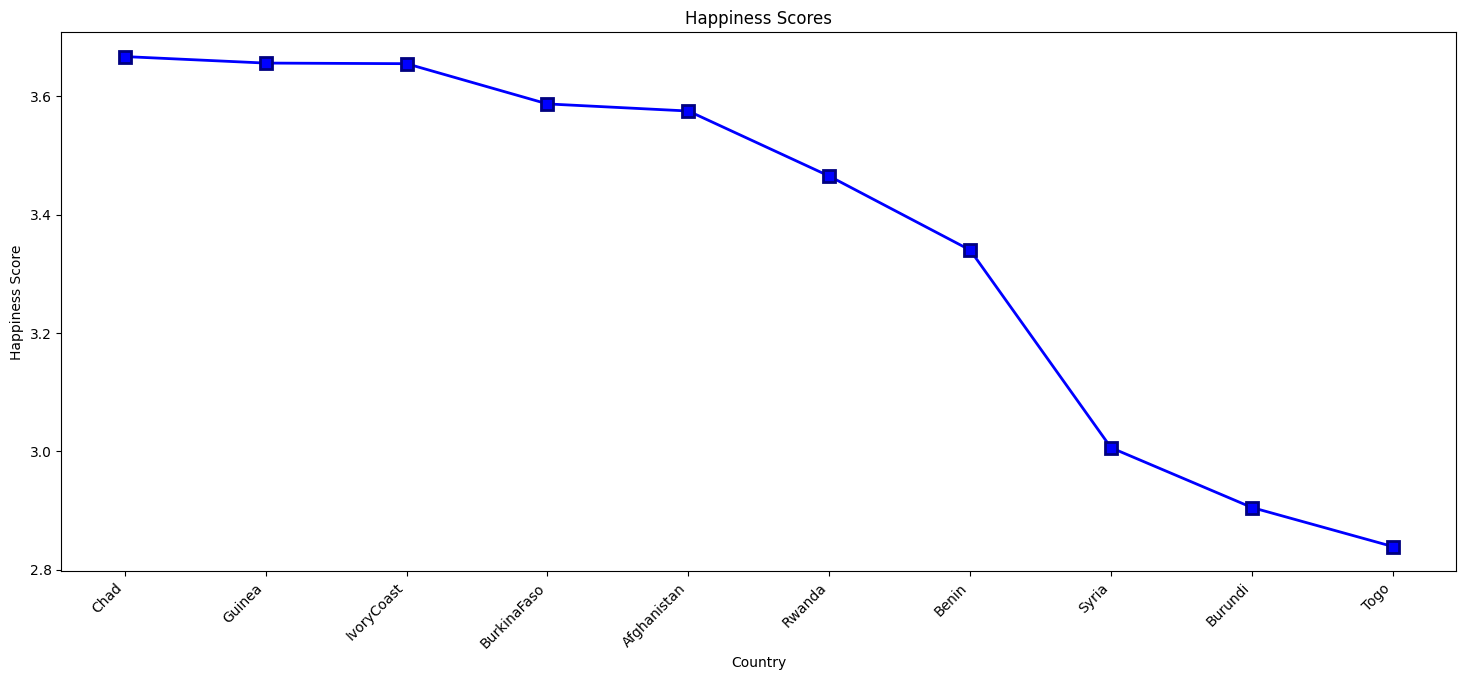

In [25]:
df2 = df.tail(10).copy()

plt.figure(figsize=(18, 7))
scores = df2["Happiness_Score"]
countries = df2["Country"]

x_positions = np.arange(len(countries))
plt.xticks(x_positions, countries, rotation=45, ha="right")
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title("Happiness Scores")

plt.plot(x_positions, scores, marker='s', c='b', ls='-', lw=2, ms=8, mew=2, mec='navy')
plt.show()


All the bottom 10 countries belong to Sub-Saharan Africa Region and 1 from Middle East and Northern Africa region ie Syria found to be least Happy countries due to world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,”

### Multivarite Analysis

##### Lets Analyze Happiness score with six key variables

In [26]:
total_countries = df.groupby('Region')['Country'].count()
total_countries

Region
AustraliaandNewZealand          2
CentralandEasternEurope        29
EasternAsia                     6
LatinAmericaandCaribbean       22
MiddleEastandNorthernAfrica    20
NorthAmerica                    2
SoutheasternAsia                9
SouthernAsia                    7
Sub-SaharanAfrica              40
WesternEurope                  21
Name: Country, dtype: int64

- The most interesting found was Sub-SaharanAfrica region contains 40 countries
- CentralandEasternEurope contains 29 countries
- LatinAmericaandCaribbean includes 22 countries..

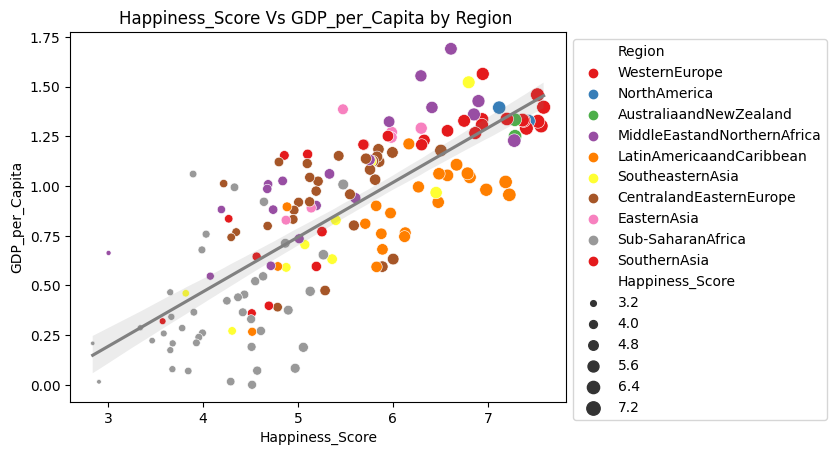

In [27]:
scatterplot = sns.scatterplot(x='Happiness_Score', y='GDP_per_Capita', hue='Region', size='Happiness_Score', sizes=(10, 100), data=df, palette='Set1')
sns.regplot(x='Happiness_Score', y='GDP_per_Capita', data=df, scatter=False, color='gray')
plt.legend(loc='upper left', fontsize='10', bbox_to_anchor=(1, 1))
plt.title('Happiness_Score Vs GDP_per_Capita by Region ')
plt.show()


- Countries from Western Europe has highest Happiness Score and GDP_per_Capita 
- Countries from Sub-SaharanAfrica region has lowest Happiness Score and GDP_per_Capita
- Countries from NorthAmerica has highest Happiness Score and GDP_per_Capita 
- Countries from LatinAmerica and Caribbean region is within the range of 5.8 to 7.3 and  GDP_per_Capita is above 0.55
- One datapoint of Southern Asia was found to be at lowest GDP and lowest Happiness score may be it would be an outlier

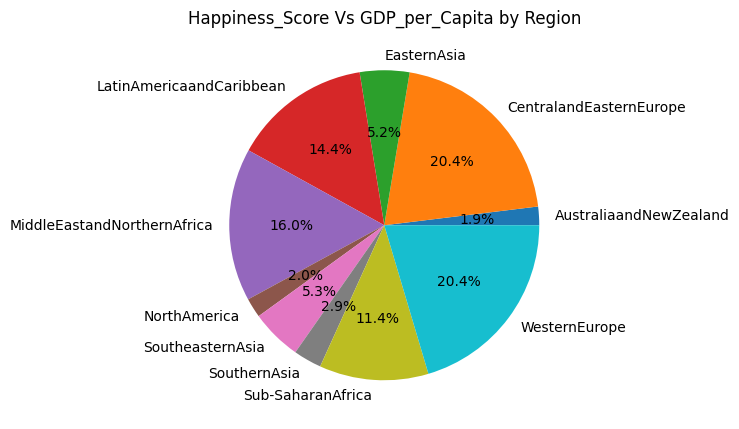

In [28]:
plt.figure(figsize=(5,10))
eco_region = df.groupby('Region')['GDP_per_Capita'].sum()
eco_region.plot.pie(autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Happiness_Score Vs GDP_per_Capita by Region')
plt.show()

- Sub-SaharanAfrica region contributing 11.4% worlds GDP, as we have around 40 countries in this region
- Western Europe contributing 20.4 worlds GDP
- To the least we have Australia and NewZealand and even NorthAmerica as they have only 2 contributing worlds GDP

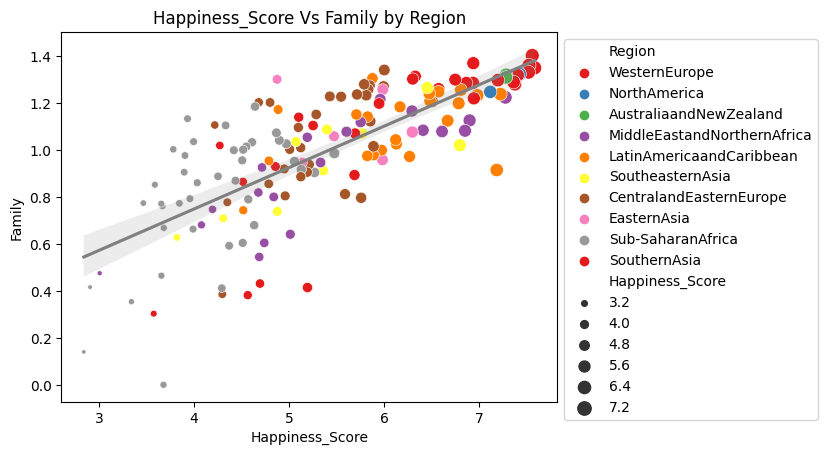

In [29]:
sns.scatterplot(x ='Happiness_Score',y='Family', hue = 'Region', size='Happiness_Score',sizes=(10, 100), data=df, palette = 'Set1')
sns.regplot(x='Happiness_Score', y='Family', data=df, scatter=False, color='gray')
plt.legend(loc='upper left', fontsize='10', bbox_to_anchor=(1, 1))
plt.title('Happiness_Score Vs Family by Region')
plt.show()

- Western Europe Region has good Hppiness_score with Family Index of 1.4
- Few Southern Asia region have least family index with 4.8 to 5.3 Happiness score may be these points are outliers
- Sub-Saharan Africa has lowest Happiness_Score and lowest Family index, may be outliers or not happy bcuz they have no families

##### Top 10 countries and bottom 10 countries Life Expectancy

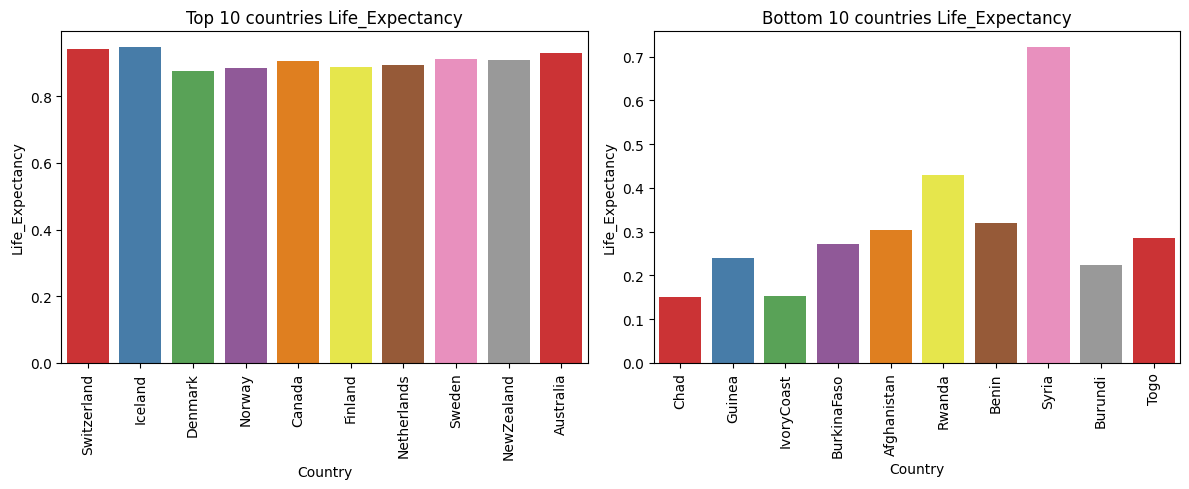

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot (Top 10 countries)
sns.barplot(x='Country', y='Life_Expectancy', data=df1, palette='Set1', ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Life_Expectancy')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Top 10 countries Life_Expectancy')

# Second subplot (Bottom 10 countries)
sns.barplot(x='Country', y='Life_Expectancy', data=df2, palette='Set1', ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Life_Expectancy')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Bottom 10 countries Life_Expectancy')

plt.tight_layout()
plt.show()


- Top countries Utopia Life_Expectancy on an average was found to be around 90 
- Bottom countries Dystopia Life_Expectancy on an average was found to be very poor (Chad and Ivory Coast)
- Syria was found to have Life_expectancy of 70

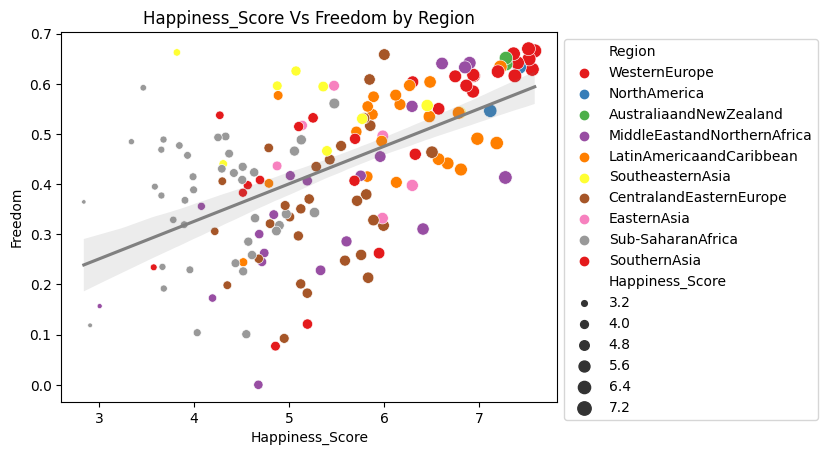

In [31]:
sns.scatterplot(x ='Happiness_Score',y='Freedom', hue = 'Region', size='Happiness_Score',sizes=(10, 100), data=df, palette = 'Set1')
sns.regplot(x='Happiness_Score', y='Freedom', data=df, scatter=False, color='gray')
plt.legend(loc='upper left', fontsize='10', bbox_to_anchor=(1, 1))
plt.title('Happiness_Score Vs Freedom by Region')
plt.show()

- Western Europe has have high Freedom to make Life choices are more and followed by NorthAmerica and AustraliaandNewZealand so is the Happiness_Score
- LatinAmericaandCaribbean has good Freedom of choices and with good Happiness score
- MiddleEastandNorthernAfrica have a range of values spread may be bcuz these regions have 20 countries the coutries which have less Freedom of chocies to make is Iraq, Egypt,Palestinian Territories and Syria
- Sub-SaharanAfrica has reasonable freedom of choices but with lowest Happiness score Burundi, Madagascar, Angola, Sudan

In [33]:
corruption = df.groupby('Region')['Government_Corruption'].mean().sort_values(ascending=True).reset_index()
corruption

Region  Government_Corruption
0      CentralandEasternEurope               0.086674
1                 SouthernAsia               0.102536
2     LatinAmericaandCaribbean               0.117172
3            Sub-SaharanAfrica               0.123878
4                  EasternAsia               0.127695
5             SoutheasternAsia               0.151276
6  MiddleEastandNorthernAfrica               0.181702
7                WesternEurope               0.231463
8                 NorthAmerica               0.244235
9       AustraliaandNewZealand               0.392795

We can see the region wise corruption index in an ascending order
- Least corruption index is in Central and Eastern Europe and
- Highest corruption index is in Australia and NewZealand eventhorugh it has two countries

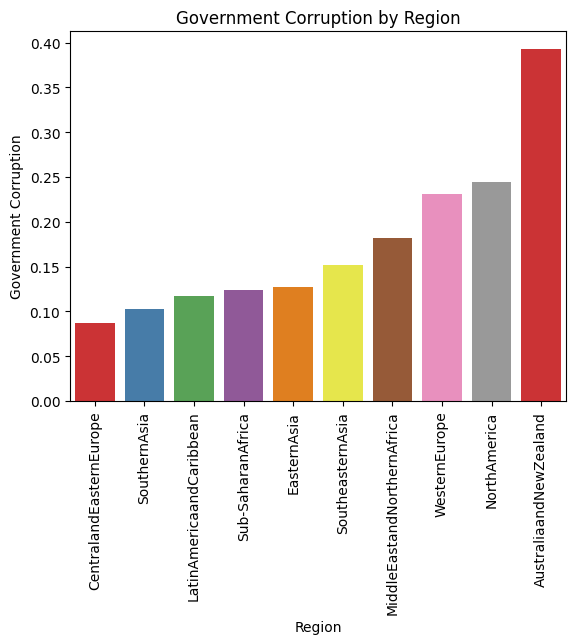

In [34]:
sns.barplot(x='Region', y='Government_Corruption', data=corruption, palette='Set1')
plt.xlabel('Region')
plt.ylabel('Government Corruption')
plt.xticks(rotation=90)  
plt.title('Government Corruption by Region')
plt.show()


- Least corruption was in Central and Eastern Europe Region
- Southern Asia shows next least corruption region
- Highest corruption was found in Australia and NewZealand
- Next highest was in North America
- 3rd highest corruption was in WesternEurope region

##### Top 10 countries and their perception of corruption

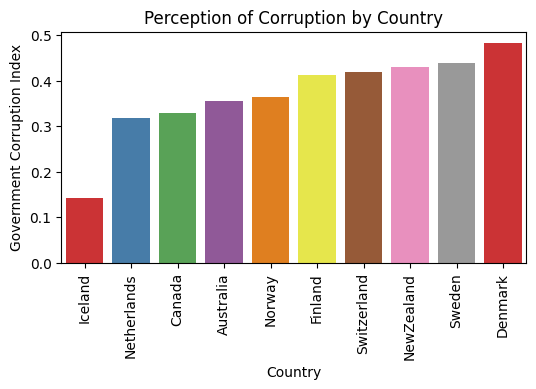

In [37]:
df1_sorted = df1.sort_values(by='Government_Corruption', ascending=True)

plt.figure(figsize=(6,3))
sns.barplot(x='Country', y='Government_Corruption', data=df1_sorted, palette='Set1')
plt.xlabel('Country')
plt.ylabel('Government Corruption Index')
plt.xticks(rotation=90)  
plt.title('Perception of Corruption by Country')
plt.show()


- Denmark found out to have highest corruption Index
- Iceland found out to have lowest corruption Index
- Other countries found out above 0.3 index

##### Bottom 10 countries and their perception of corruption

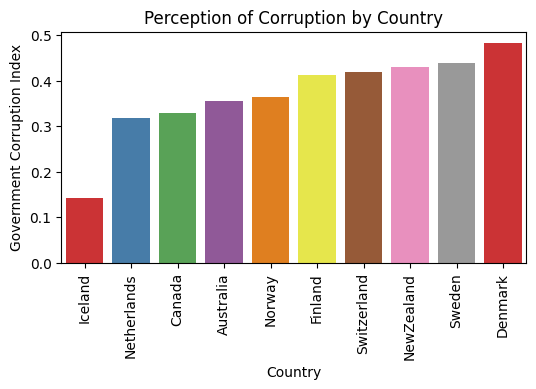

In [38]:
df2_sorted = df1.sort_values(by='Government_Corruption', ascending=True)

plt.figure(figsize=(6,3))
sns.barplot(x='Country', y='Government_Corruption', data=df2_sorted, palette='Set1')
plt.xlabel('Country')
plt.ylabel('Government Corruption Index')
plt.xticks(rotation=90)  
plt.title('Perception of Corruption by Country')
plt.show()

- Rwanda was found to have highest corruption Index accordind 2017 reports
- Chad was found to have lowest corruption Index 
- Other countries was having corruption index below 0.2

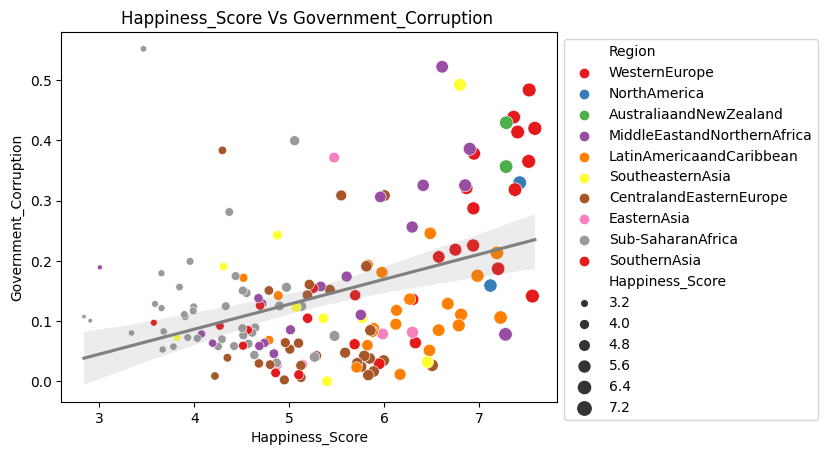

In [39]:
sns.scatterplot(x ='Happiness_Score',y='Government_Corruption', hue = 'Region', size='Happiness_Score',sizes=(10, 100), data=df, palette = 'Set1')
sns.regplot(x='Happiness_Score', y='Government_Corruption', data=df, scatter=False, color='gray')
plt.legend(loc='upper left', fontsize='10', bbox_to_anchor=(1, 1))
plt.title('Happiness_Score Vs Government_Corruption ')
plt.show()

- The countries with highest Happiness_Score index has highest corruption
- The countries with lowest Happiness_Score index has lowest corruption
- LatinAmericaandCaribbean has reasonable Happiess_score with lowest Corruption index
- Central and Eastern Europe has lowest Corruption index with reasobale Happiness_Score

### Encoding

In [40]:
import pandas as pd

encoded_regions = pd.get_dummies(df['Region'])
df = pd.concat([df, encoded_regions], axis=1)
df.drop('Region', axis=1, inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

We did label encoding for the country column and getdummies on the Region column so that Machine understand the language while training

In [42]:
df = df.replace({True: 1, False: 0})

In [43]:
df

Country  Happiness_Rank  Happiness_Score  Standard_Error  GDP_per_Capita  \
0        135               1            7.587         0.03411         1.39651   
1         58               2            7.561         0.04884         1.30232   
2         37               3            7.527         0.03328         1.32548   
3        105               4            7.522         0.03880         1.45900   
4         24               5            7.427         0.03553         1.32629   
..       ...             ...              ...             ...             ...   
153      118             154            3.465         0.03464         0.22208   
154       13             155            3.340         0.03656         0.28665   
155      136             156            3.006         0.05015         0.66320   
156       21             157            2.905         0.08658         0.01530   
157      141             158            2.839         0.06727         0.20868   

      Family  Life_Expectancy  Freedom  Government_Corruption  Generosity  \
0    1.34951          0.94143  0.66557                0.41978     0.29678   
1    1.40223          0.94784  0.62877                0.14145     0.43630   
2    1.36058          0.87464  0.64938                0.48357     0.34139   
3    1.33095          0.88521  0.66973                0.36503     0.34699   
4    1.32261          0.90563  0.63297                0.32957     0.45811   
..       ...              ...      ...                    ...         ...   
153  0.77370          0.42864  0.59201                0.55191     0.22628   
154  0.35386          0.31910  0.48450                0.08010     0.18260   
155  0.47489          0.72193  0.15684                0.18906     0.47179   
156  0.41587          0.22396  0.11850                0.10062     0.19727   
157  0.13995          0.28443  0.36453                0.10731     0.16681   

     ...  AustraliaandNewZealand  CentralandEasternEurope  EasternAsia  \
0    ...                       0                        0            0   
1    ...                       0                        0            0   
2    ...                       0                        0            0   
3    ...                       0                        0            0   
4    ...                       0                        0            0   
..   ...                     ...                      ...          ...   
153  ...                       0                        0            0   
154  ...                       0                        0            0   
155  ...                       0                        0            0   
156  ...                       0                        0            0   
157  ...                       0                        0            0   

     LatinAmericaandCaribbean  MiddleEastandNorthernAfrica  NorthAmerica  \
0                           0                            0             0   
1                           0                            0             0   
2                           0                            0             0   
3                           0                            0             0   
4                           0                            0             1   
..                        ...                          ...           ...   
153                         0                            0             0   
154                         0                            0             0   
155                         0                            1             0   
156                         0                            0             0   
157                         0                            0             0   

     SoutheasternAsia  SouthernAsia  Sub-SaharanAfrica  WesternEurope  
0                   0             0                  0              1  
1                   0             0                  0              1  
2                   0             0                  0              1  
3                

### Distribution plots

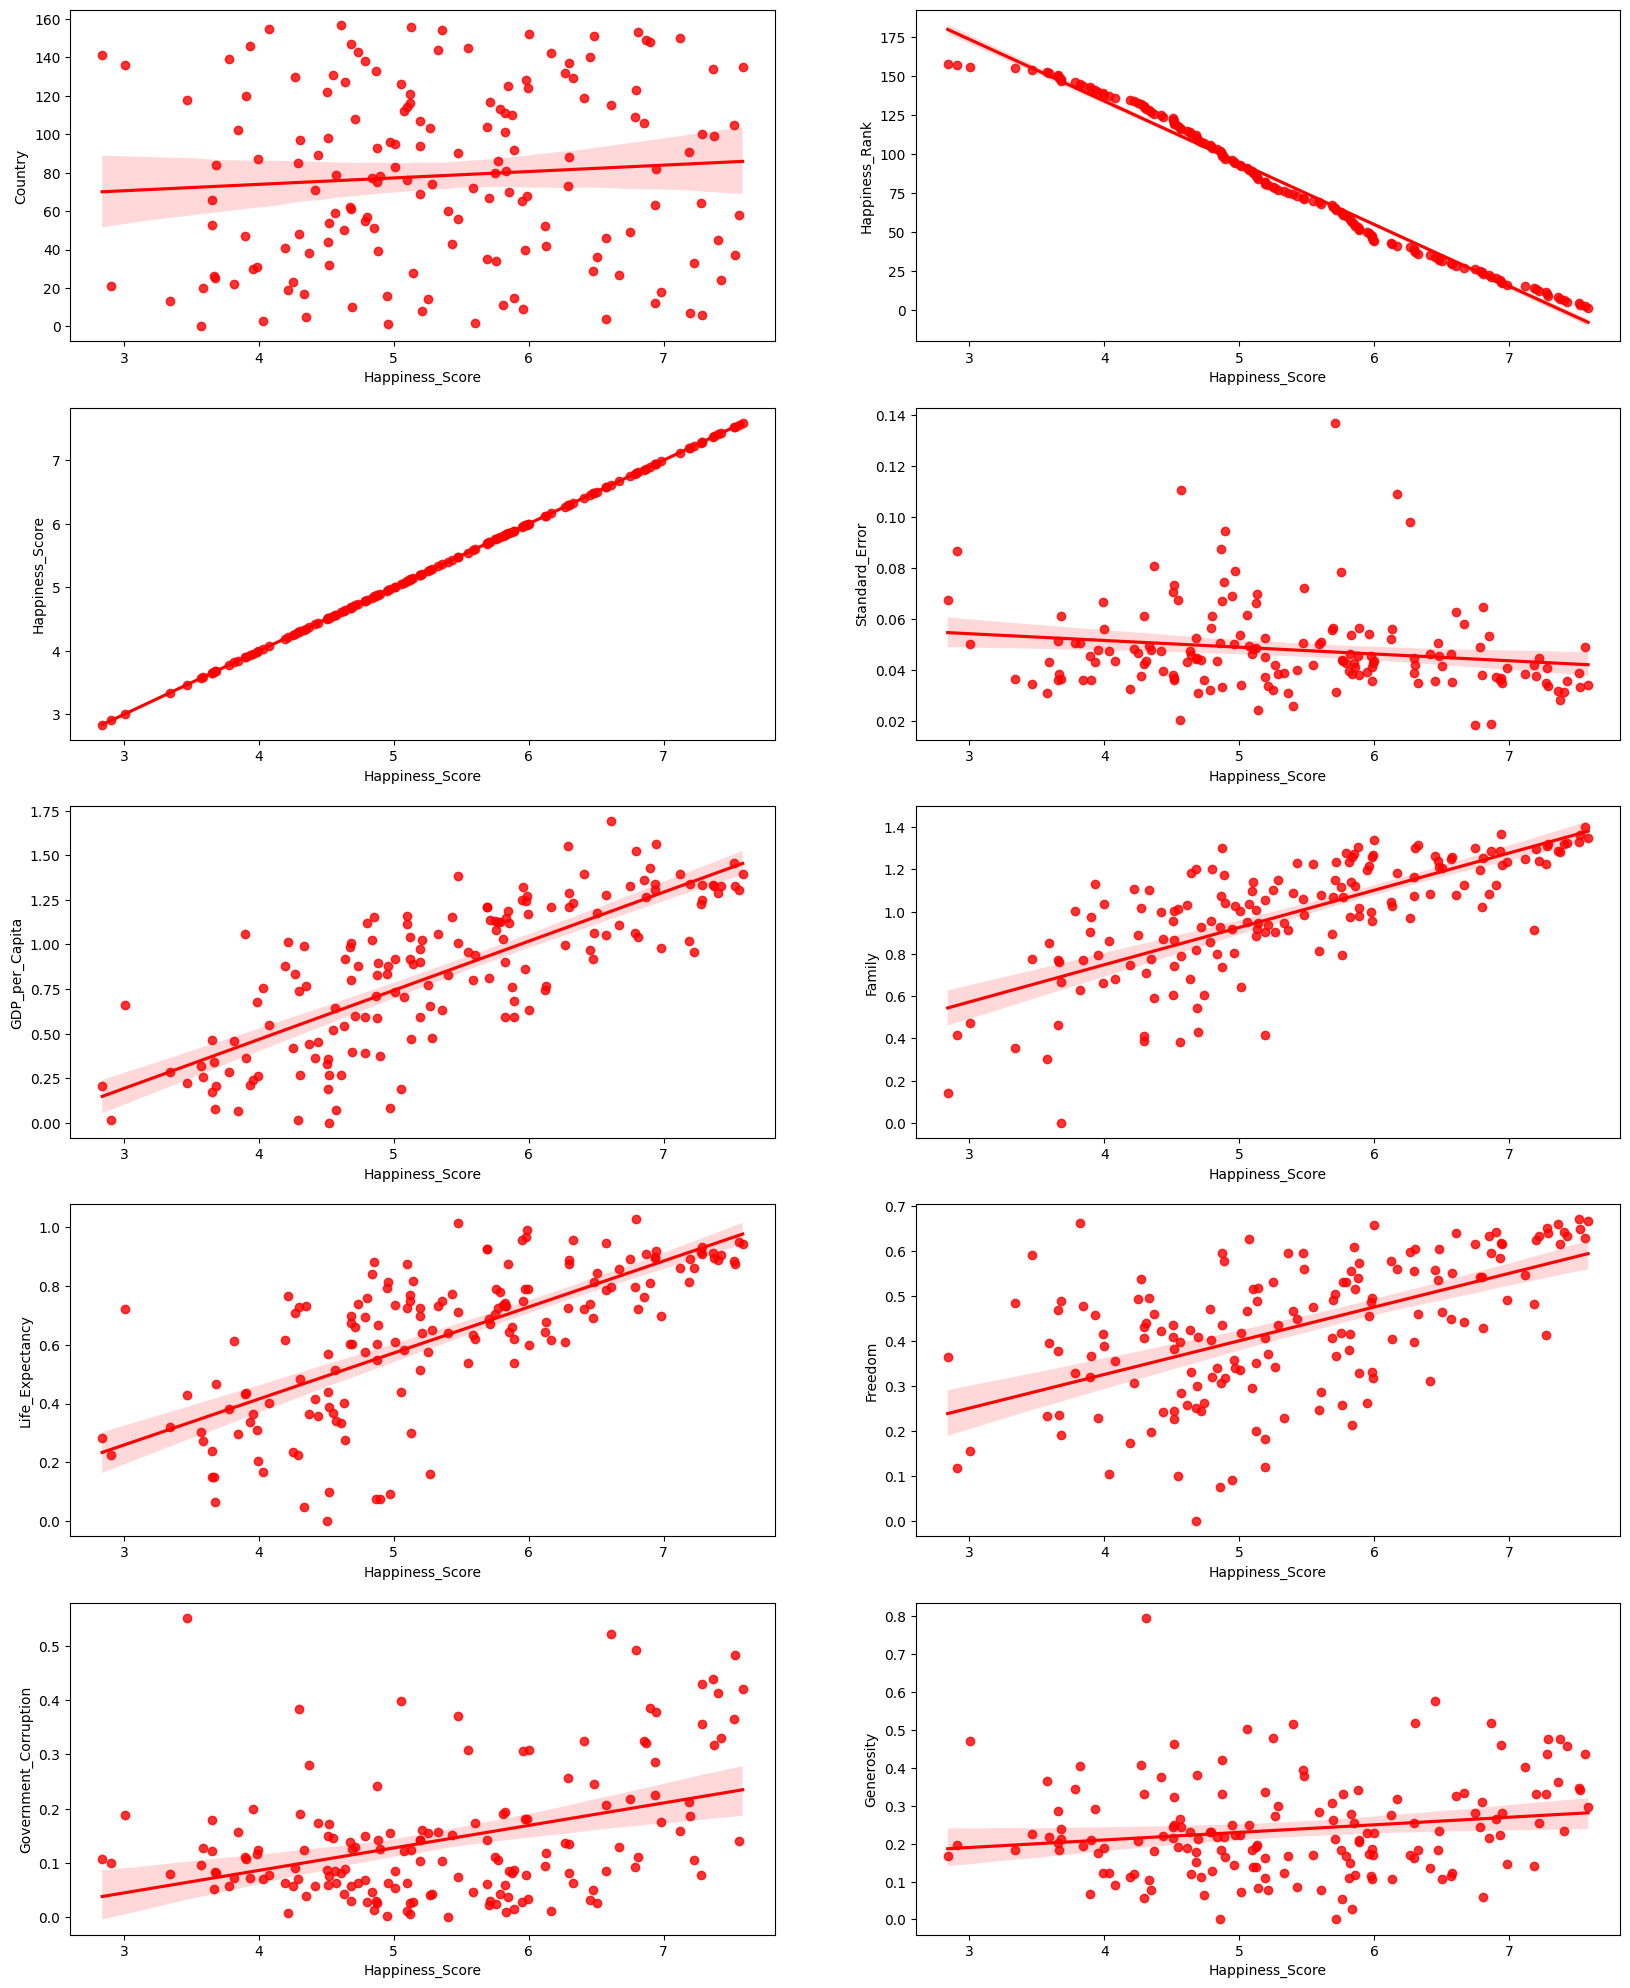

In [44]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p <= 10:
        plt.subplot(5,2,p)
        sns.regplot(x= 'Happiness_Score', y =i, data =df, color = 'r')
        plt.xlabel('Happiness_Score')
        plt.ylabel(i)
    p+=1
plt.show()


A positive correlation is seen in:
- GDP vs Happiness Score
- Lif_Expectancy vs Happiness Score
- Freedom vs Happiness Score
- Family vs Happiness Score

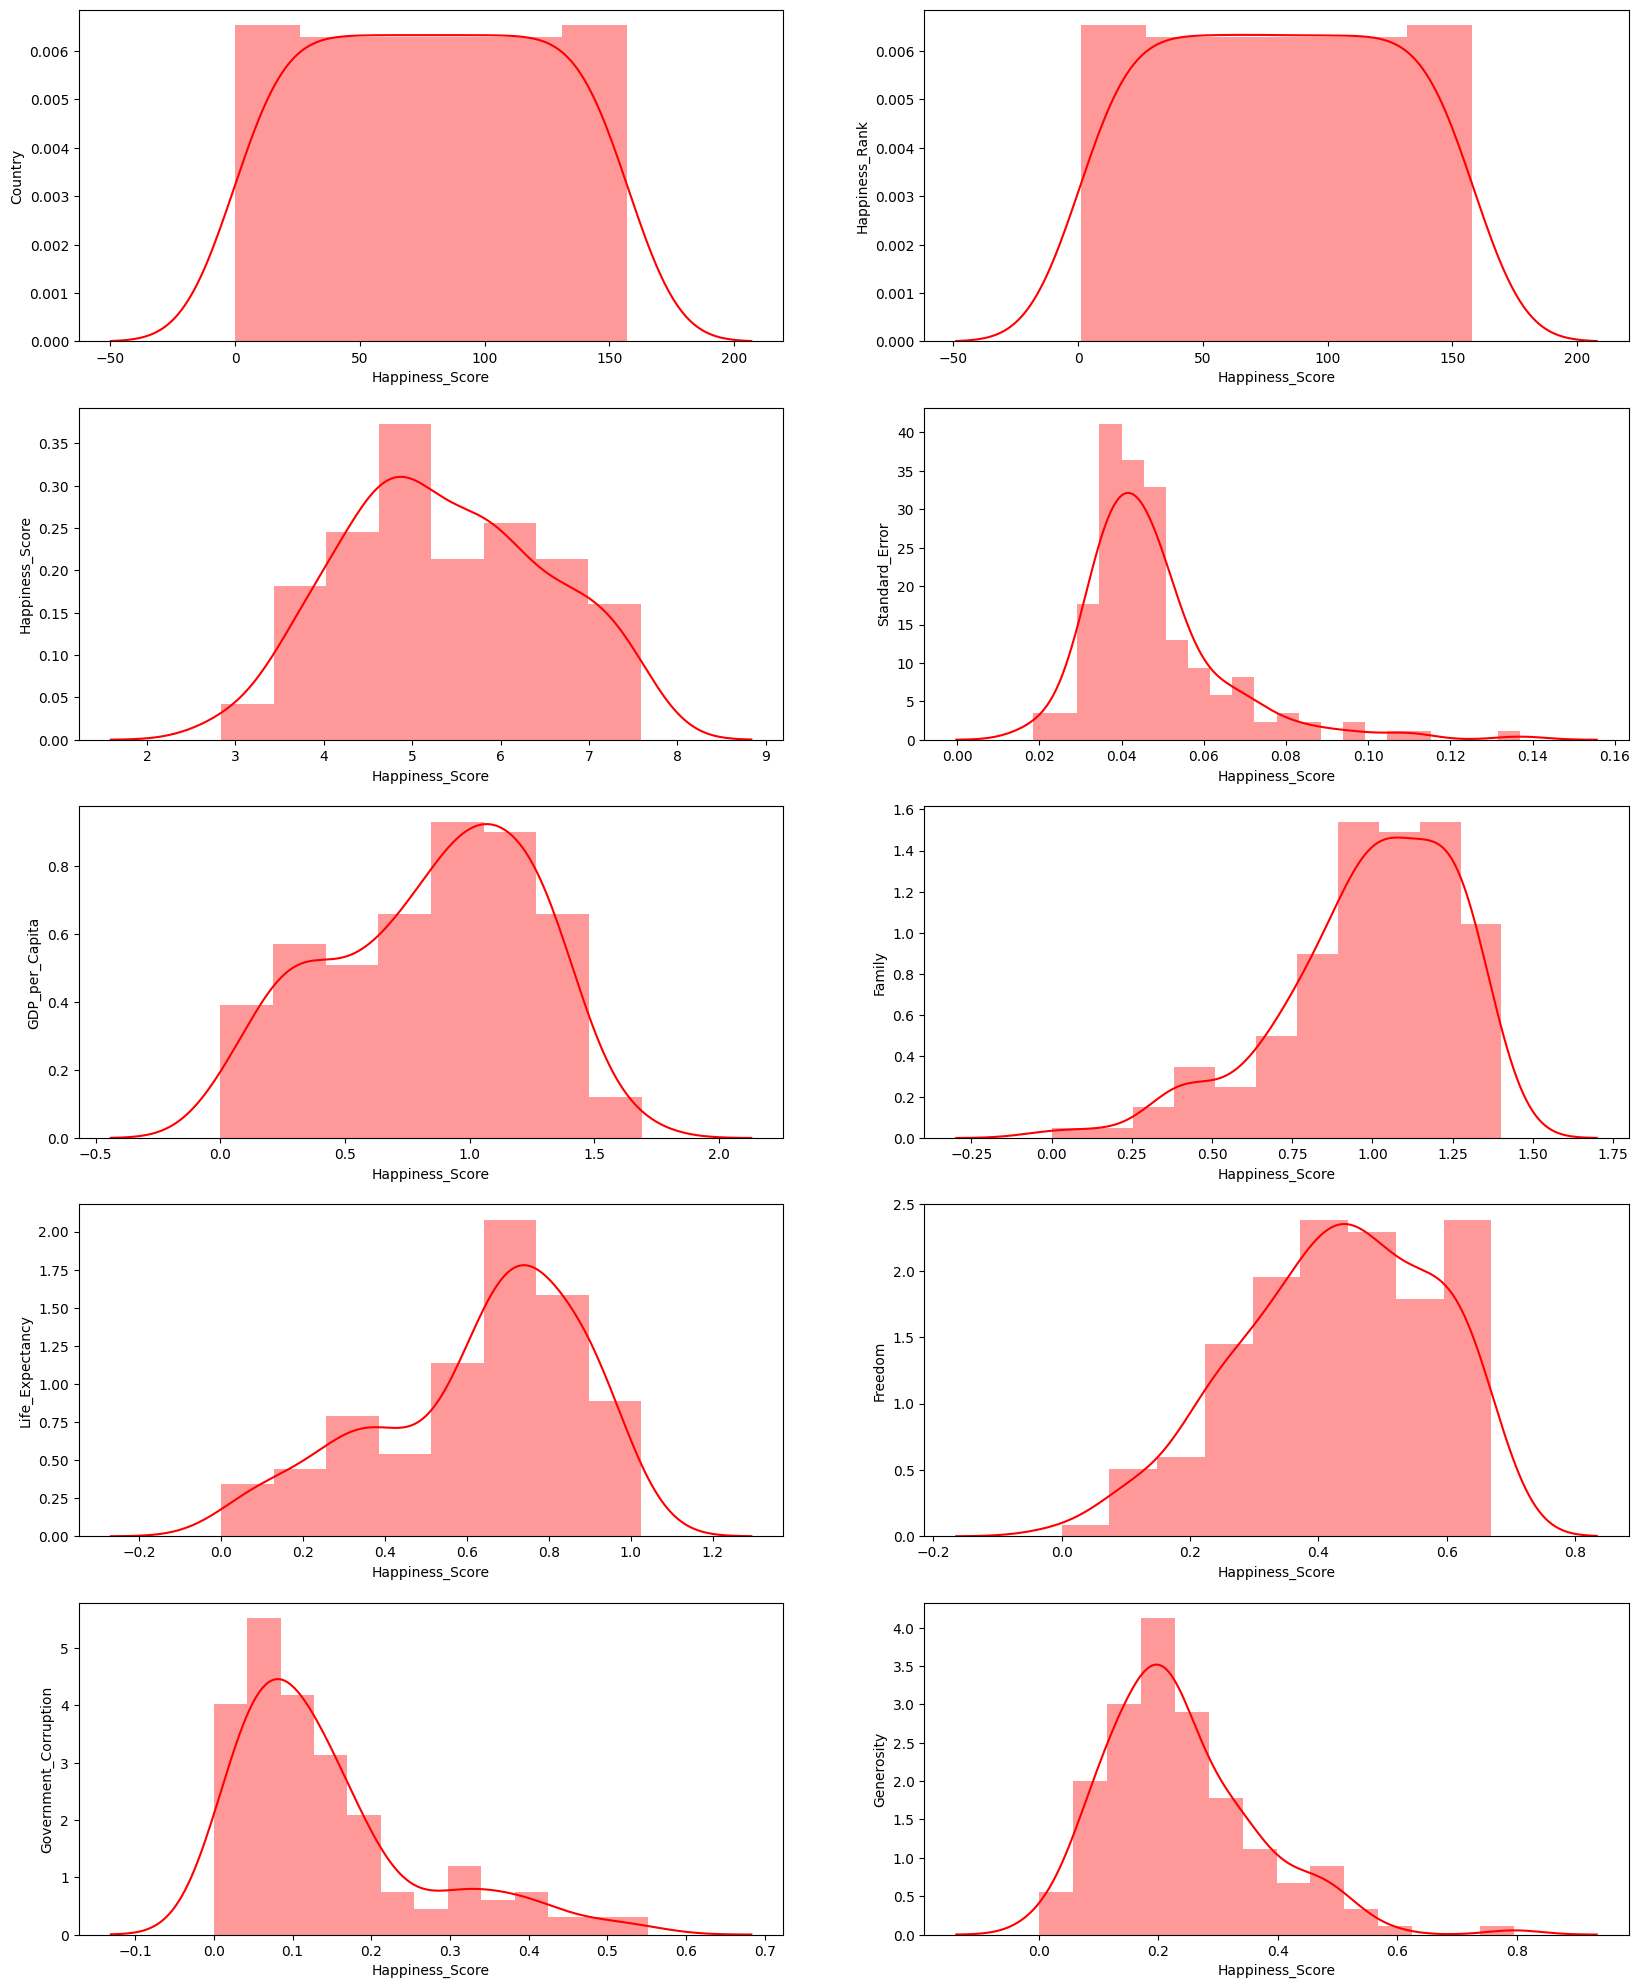

In [45]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p <= 10:
        plt.subplot(5,2,p)
        sns.distplot(df[i],kde=True, color='red')
        plt.xlabel('Happiness_Score')
        plt.ylabel(i)
    p+=1
plt.show()

 Almost normal distribution is seen in :
 - Generosity Vs Happiness_Score
 - rest of variables show slightly skewed distribution curve (GDP_per_Capita, Standard_Error Family, Life_Expectancy, Freedom, Government_Corruption)

In [46]:
df3 = df[['Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'GDP_per_Capita', 'Family', 'Life_Expectancy', 'Freedom', 'Government_Corruption', 'Generosity', 'Dystopia_Residual']]

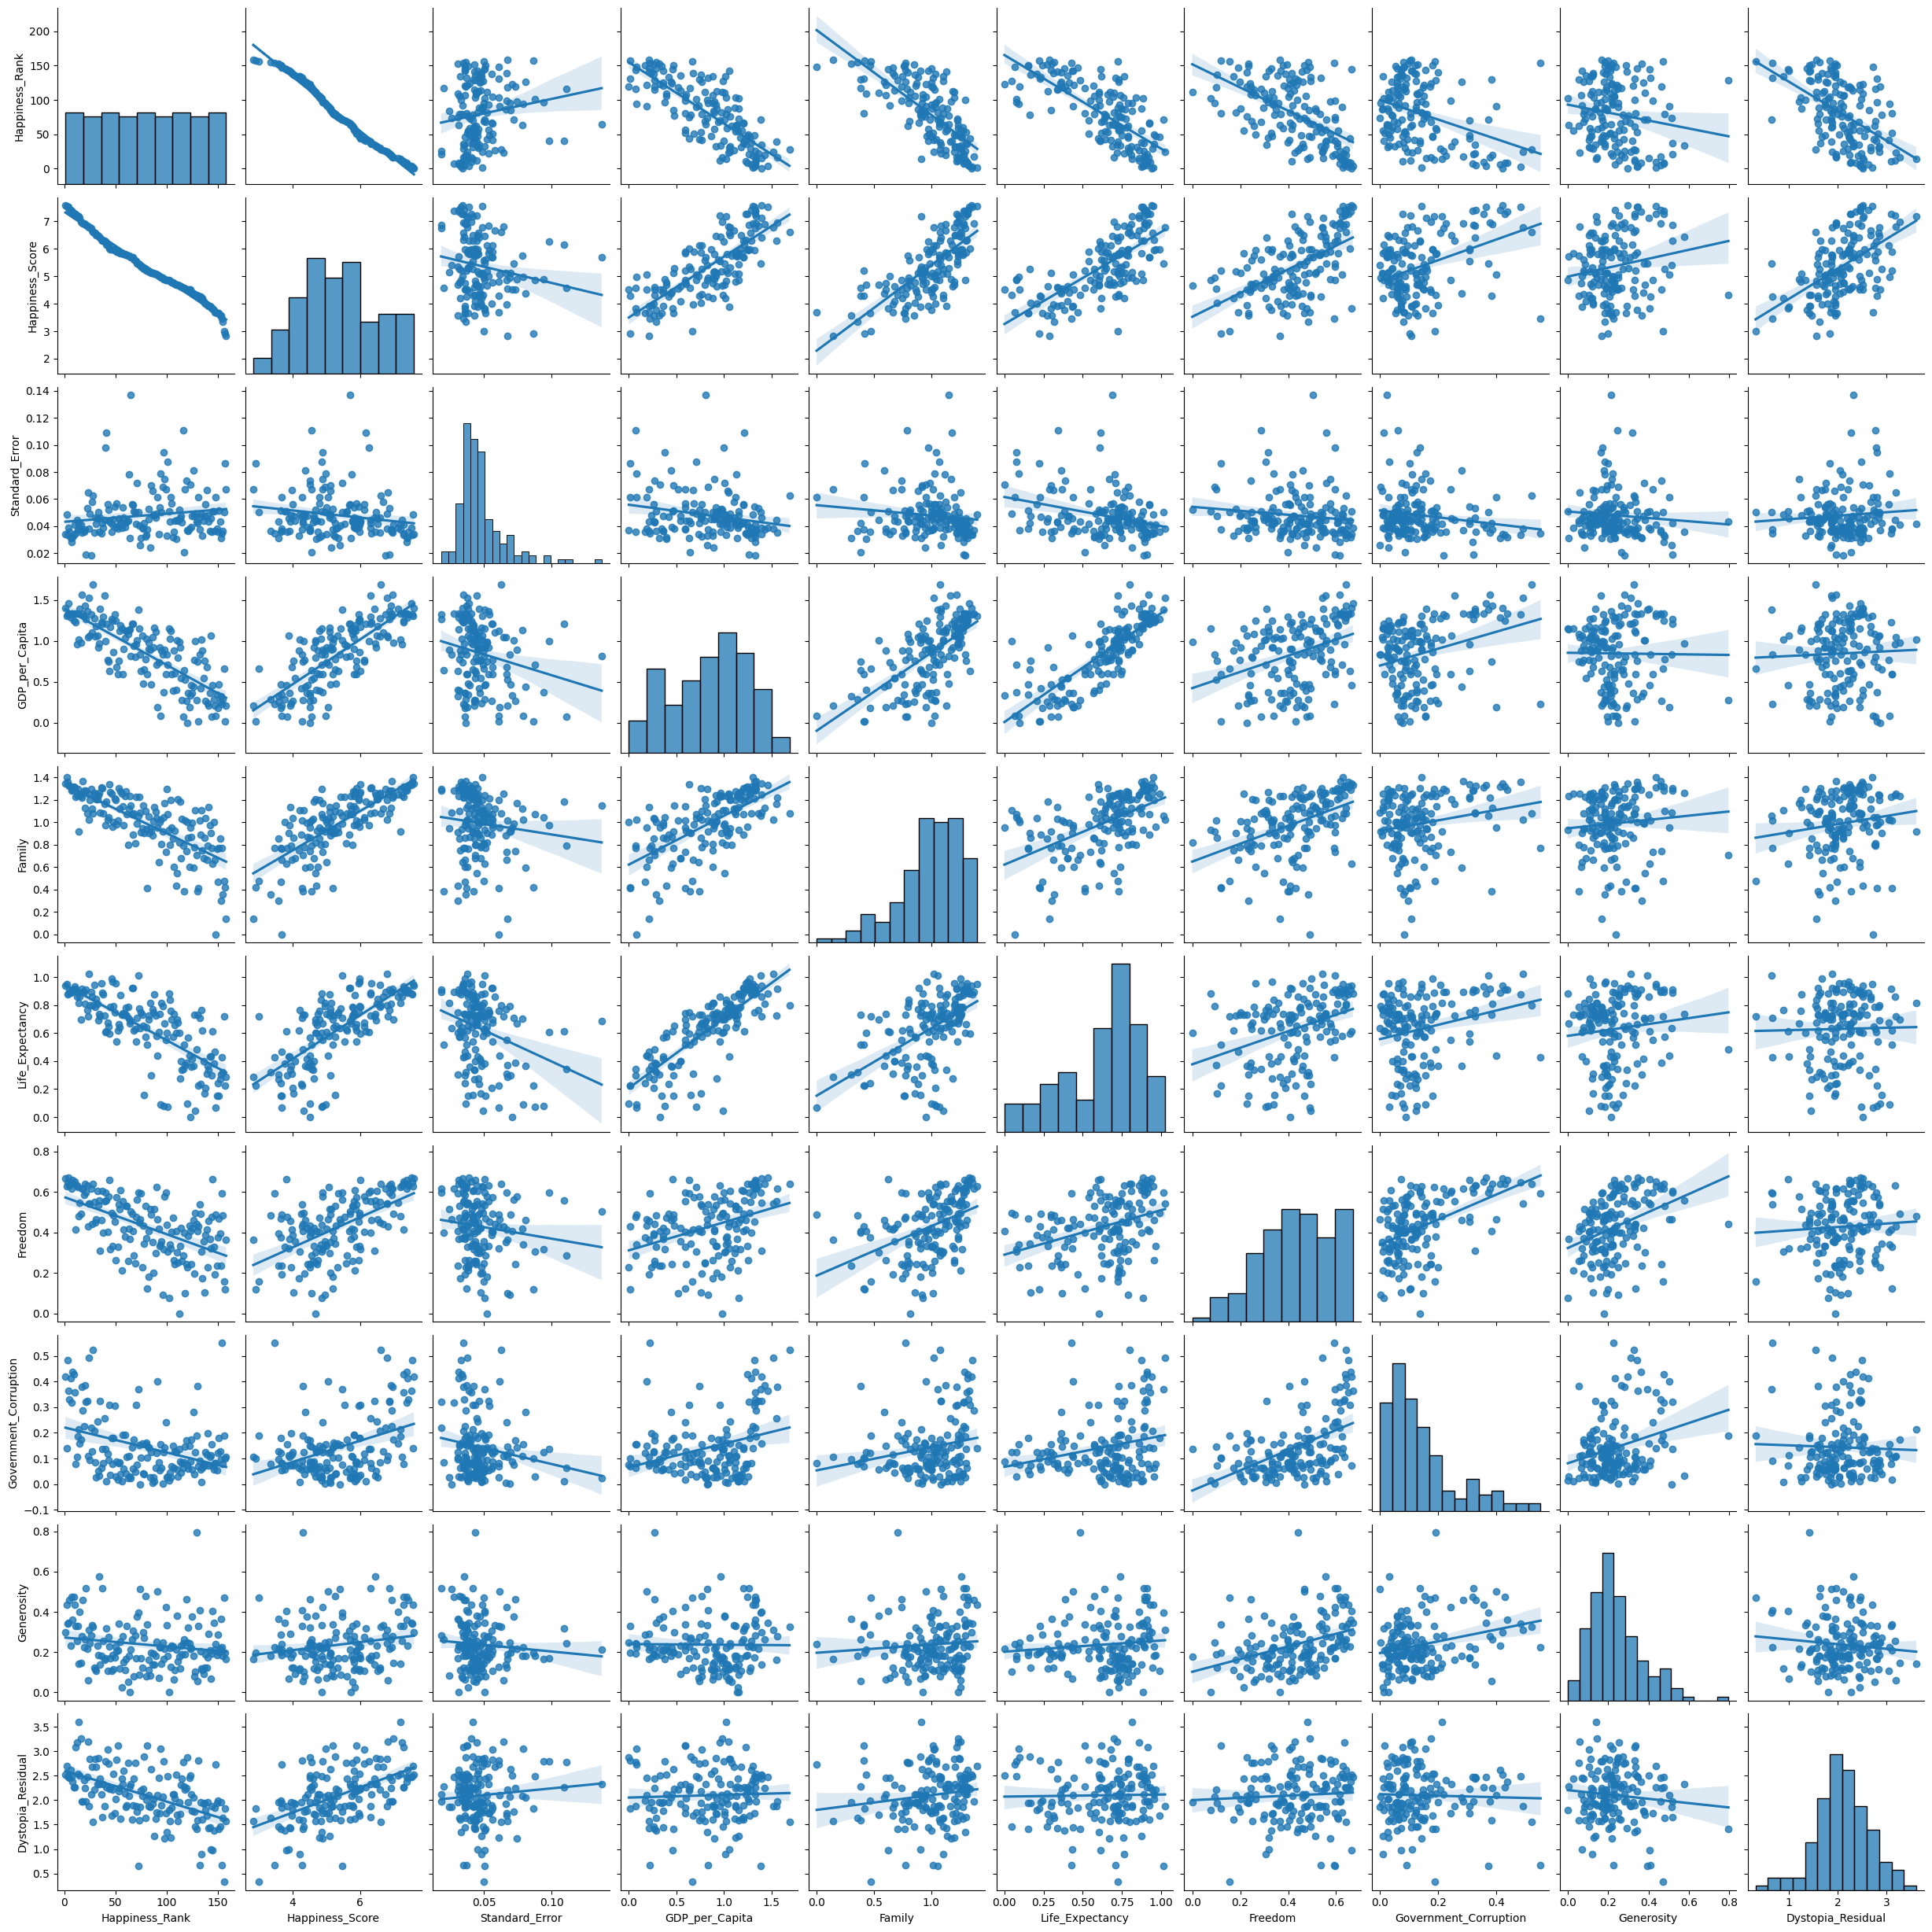

In [47]:
sns.pairplot(data=df3 ,kind='reg')

We can visualize the relation between each variable and target variable
- Few are positiviely relation where is graph is going upwards
- Few are negatively correlated where grah is moving dowanwards
- Some have no relation

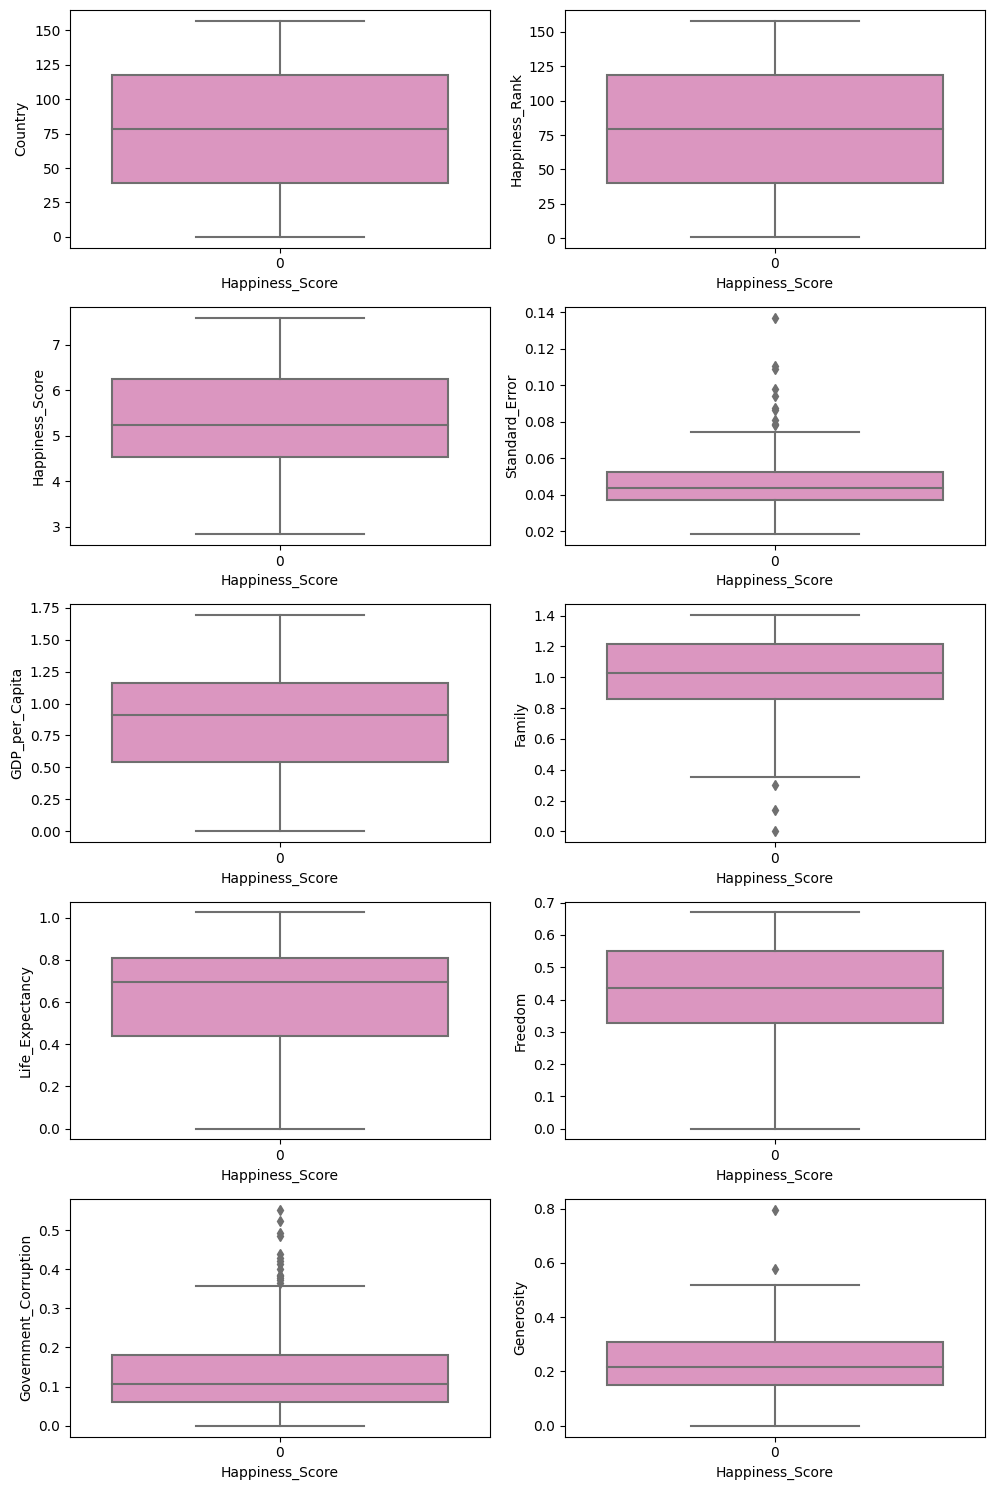

In [48]:
plt.figure(figsize=(10, 15))  
p = 1
for i in df:
    if p <= 10:
        plt.subplot( 5,2, p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel('Happiness_Score')
        plt.ylabel(i)
    p += 1
plt.tight_layout()  
plt.show()

 Outliers are visible in Standard_Error, Family, Government_Corruption, Generosity which need to be capped to improve model performance

### Lets work on outliers

In [49]:
def cap_outliers(df):
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        lower_bound = Q1 - outlier_step
        df[col][df[col] < lower_bound] = lower_bound

        upper_bound = Q3 + outlier_step
        df[col][df[col] > upper_bound] = upper_bound

    return df

df = cap_outliers(df)

print(df.shape)


(158, 21)


We removed outliers using IQR method

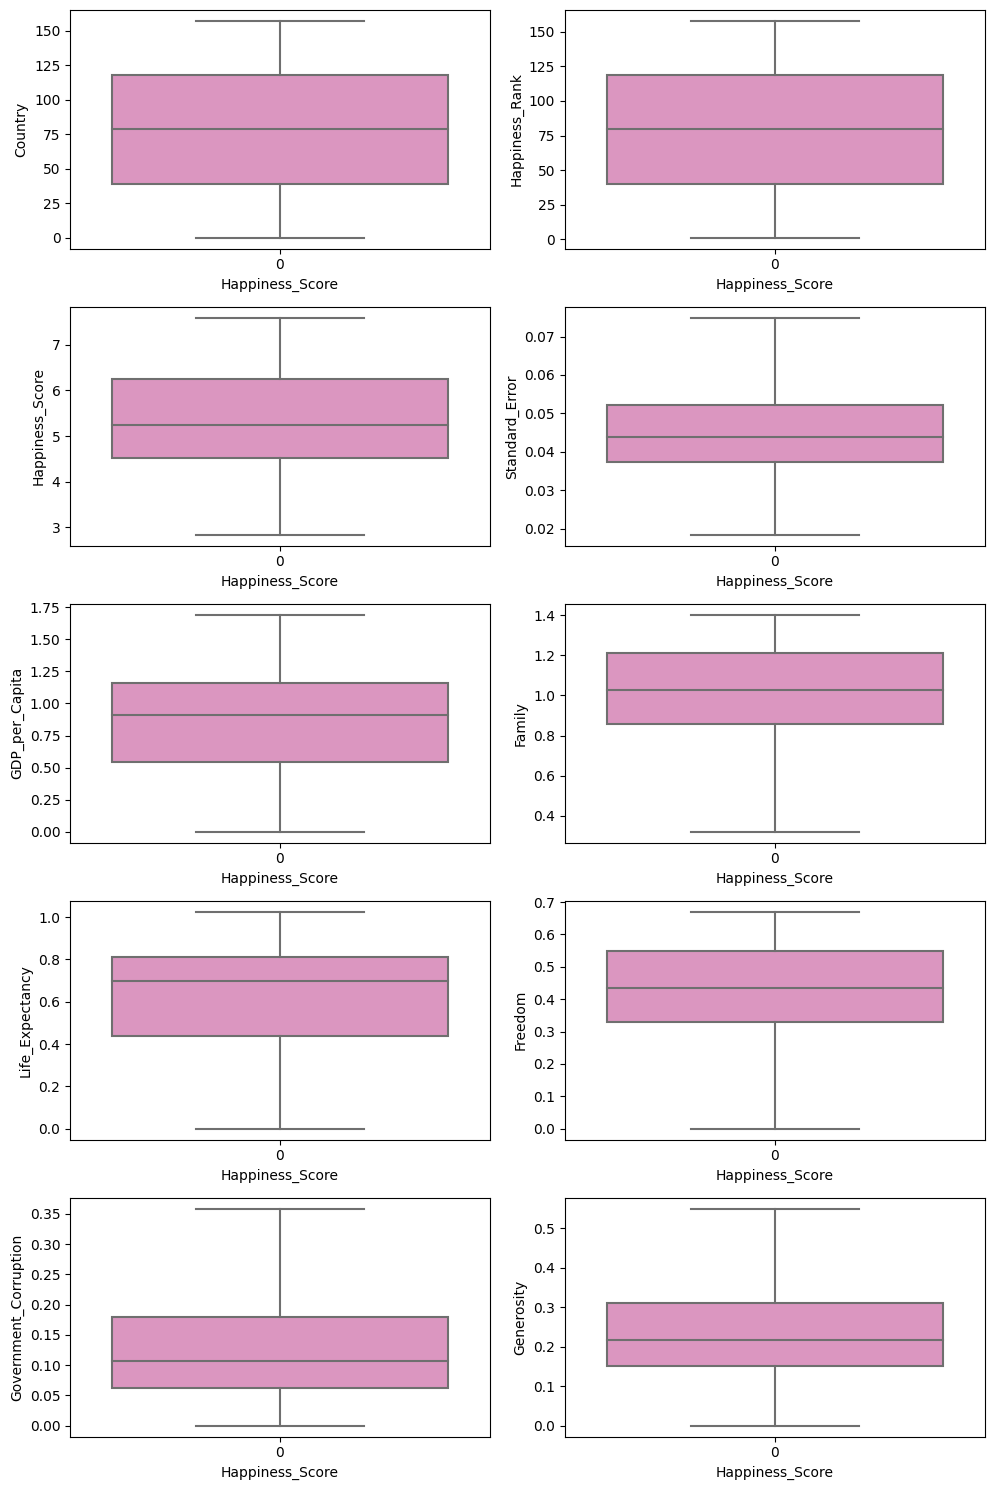

In [50]:
plt.figure(figsize=(10, 15))  
p = 1
for i in df:
    if p <= 10:
        plt.subplot(5,2, p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel('Happiness_Score')
        plt.ylabel(i)
    p += 1
plt.tight_layout()  
plt.show()

Outliers are successfully removed

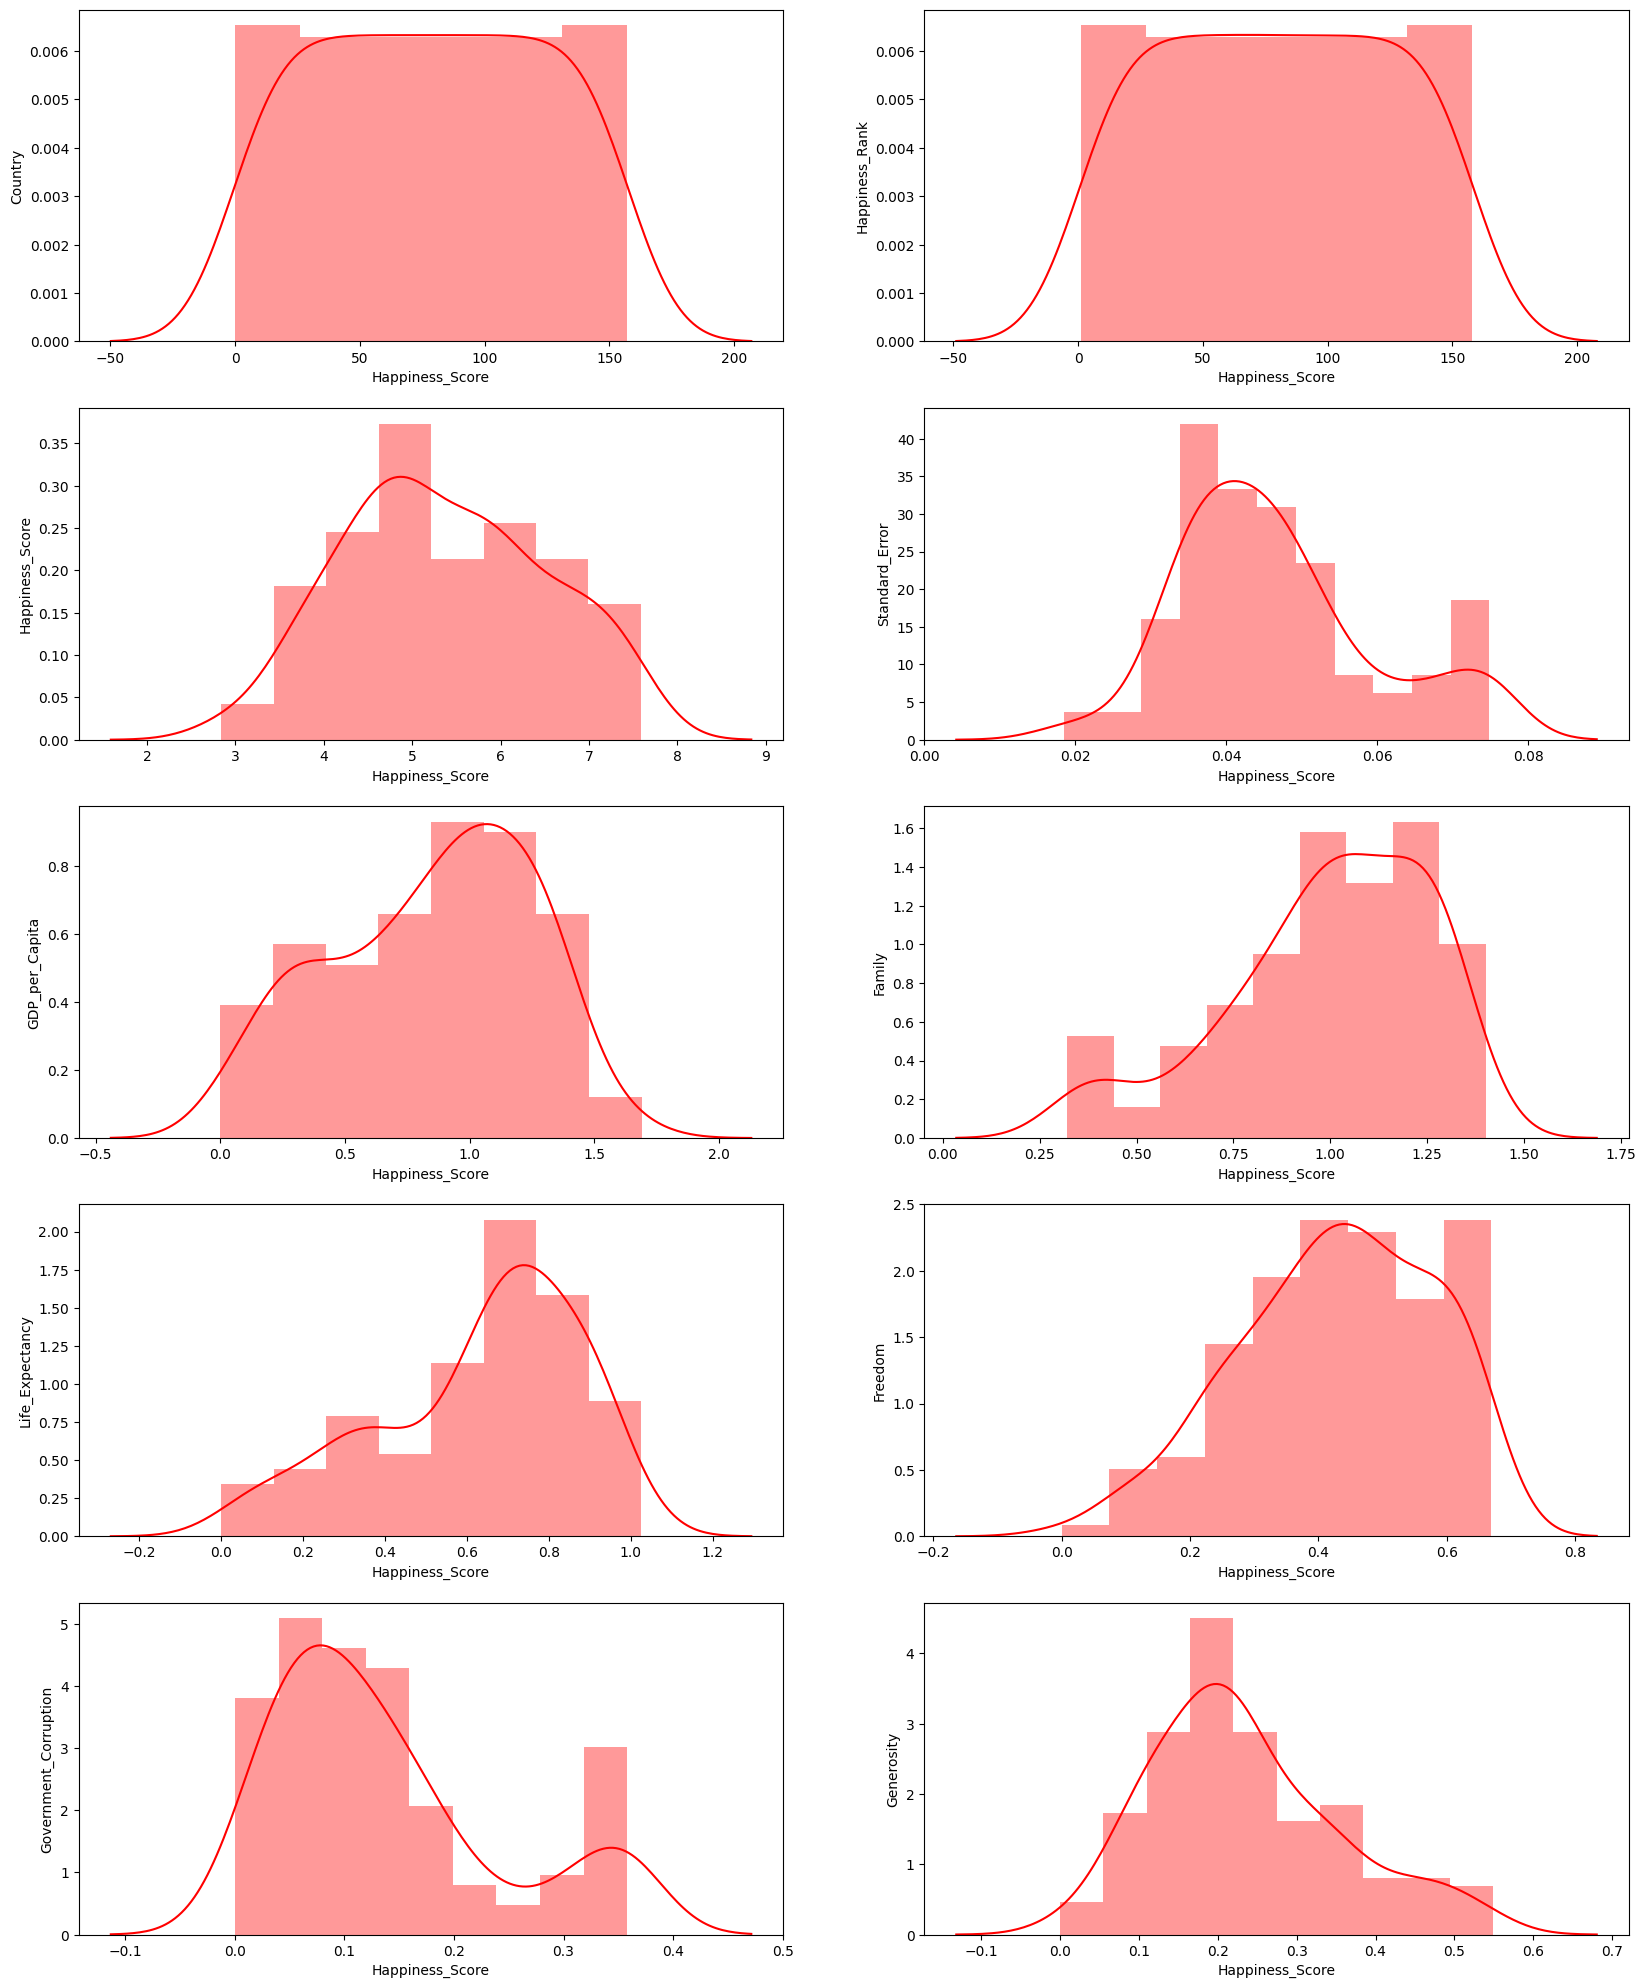

In [51]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p <= 10:
        plt.subplot(5,2,p)
        sns.distplot(df[i],kde=True, color='red')
        plt.xlabel('Happiness_Score')
        plt.ylabel(i)
    p+=1
plt.show()

We can see the distribution before and after outlier removal a slight changes are observed

### Heat map

<Axes: >

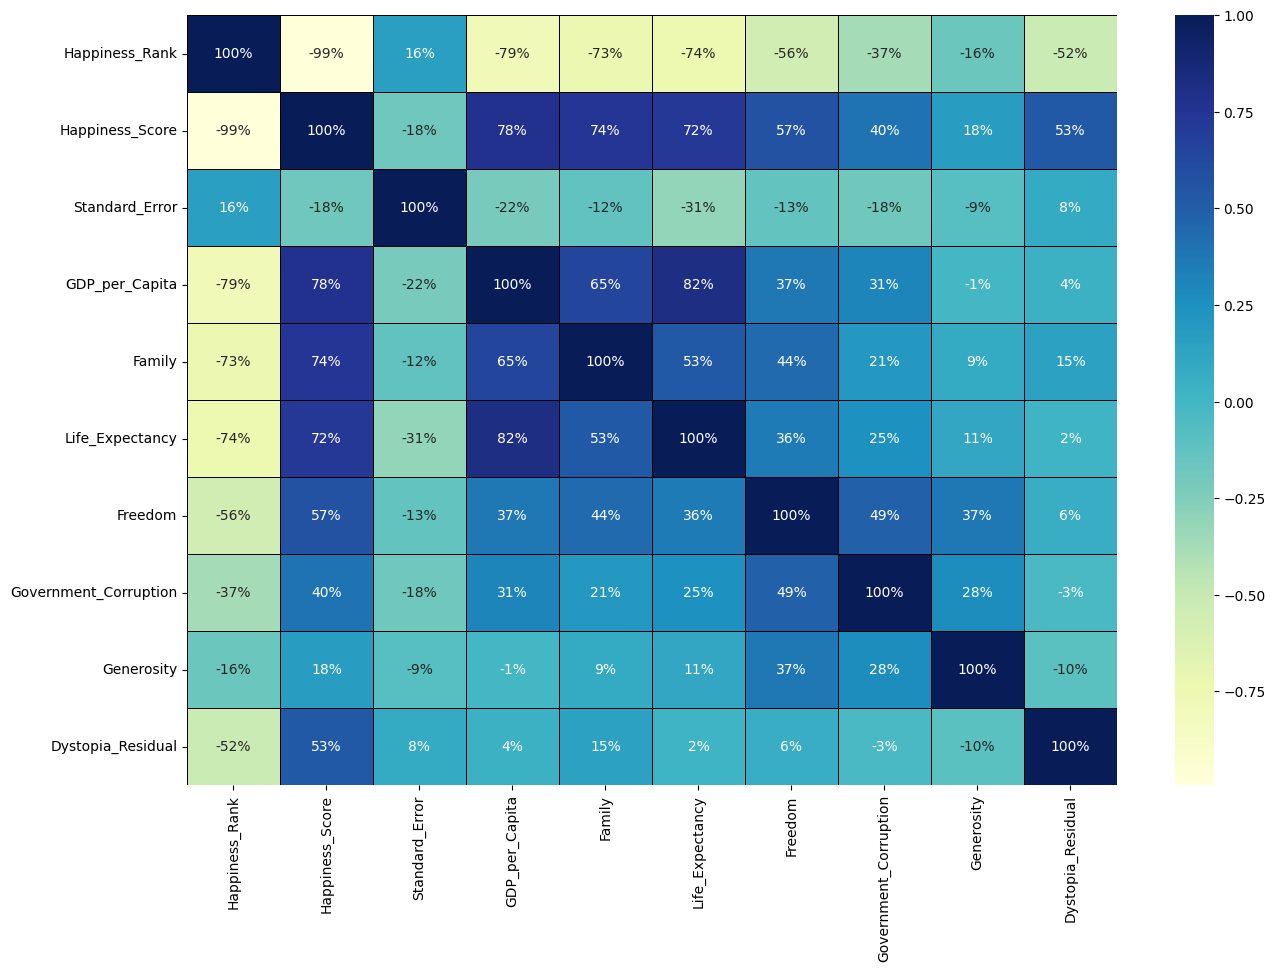

In [52]:
corr = df3.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,cmap='YlGnBu',annot=True, linewidth=.5,fmt='0.0%',linecolor='black')

- Happiness_Rank and Happiness_Score is 99% correlated 
- Happiness_Rank is 73% correlated with family and 74% with Life_Expectancy and 79% with GDP
- Happiness_Score is 74% correlated with family and 72% with Life_Expectancy and 78% with GDP which may cause multicollinearity issue
- Low correlation with family and Generosity variables and even with Life_Expenctancy and Generosity

In [53]:
df3.corr().Happiness_Score.sort_values()

Happiness_Rank          -0.992105
Standard_Error          -0.177254
Generosity               0.180319
Government_Corruption    0.395199
Dystopia_Residual        0.530474
Freedom                  0.568211
Life_Expectancy          0.724200
Family                   0.740605
GDP_per_Capita           0.780966
Happiness_Score          1.000000
Name: Happiness_Score, dtype: float64

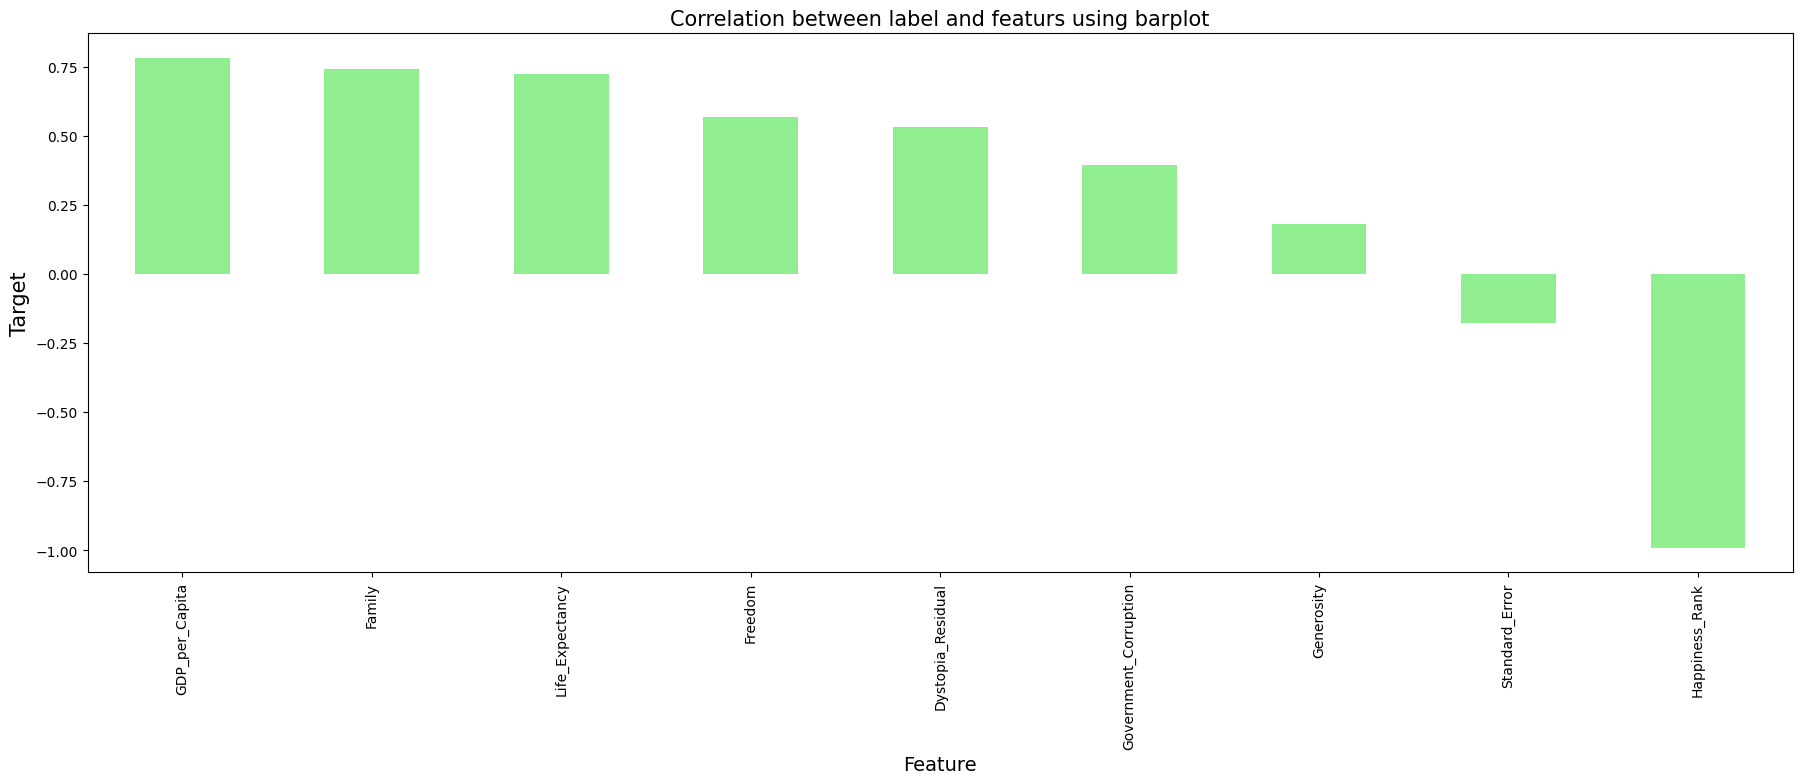

In [54]:
plt.figure(figsize = (22,7))
df3.corr()['Happiness_Score'].sort_values(ascending = False).drop(['Happiness_Score']).plot(kind='bar',color = 'lightgreen')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Target', fontsize =15)
plt.title('Correlation between label and featurs using barplot', fontsize = 15)
plt.show()

The bar graph the positive and negative correlation with the target vatraible

##### Seaparating features from target variables

In [55]:
x= df3.drop('Happiness_Score',axis=1)
y= df3['Happiness_Score']

print('Feature Dimension:',x.shape)
print('label Dimension:',y.shape)

Feature Dimension: (158, 9)
label Dimension: (158,)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                     
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Happiness_Rank  Standard_Error  GDP_per_Capita    Family  \
0         -1.721000       -0.805926        1.369621  1.320281   
1         -1.699075        0.055889        1.135226  1.514458   
2         -1.677149       -0.854487        1.192861  1.361054   
3         -1.655224       -0.531526        1.525130  1.251922   
4         -1.633299       -0.722845        1.194876  1.221204   
..              ...             ...             ...       ...   
153        1.633576       -0.774917       -1.552987 -0.800520   
154        1.655501       -0.662582       -1.392303 -2.346860   
155        1.677427        0.132534       -0.455245 -1.901086   
156        1.699352        2.263962       -2.067566 -2.118467   
157        1.721277        1.134182       -1.586334 -3.134725   

     Life_Expectancy   Freedom  Government_Corruption  Generosity  \
0           1.263408  1.577438               2.309652    0.471040   
1           1.289434  1.332456              -0.016480    1.575856   
2           0.992229  1.469659               2.842774    0.824293   
3           1.035145  1.605131               1.852081    0.868638   
4           1.118054  1.360416               1.555725    1.748563   
..               ...       ...                    ...         ...   
153        -0.818610  1.087740               3.413922   -0.087228   
154        -1.263362  0.372033              -0.529210   -0.433117   
155         0.372199 -1.809238               0.381419    1.856891   
156        -1.649648 -2.064472              -0.357715   -0.316950   
157        -1.404129 -0.426621              -0.301803   -0.558153   

     Dystopia_Residual  
0             0.758258  
1             1.092857  
2             0.712335  
3             0.663893  
4             0.639337  
..                 ...  
153          -2.588925  
154          -0.843967  
155          -3.208430  
156          -0.481985  
157          -0.963612  

[158 rows x 9 columns]

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

VIF values               Features
0   71.573977         Happiness_Rank
1    1.177539         Standard_Error
2   12.578340         GDP_per_Capita
3    5.539781                 Family
4    7.951242        Life_Expectancy
5    3.079817                Freedom
6    1.948717  Government_Corruption
7    1.898209             Generosity
8   16.988518      Dystopia_Residual

Happiness_Rank has highest VIF value of 71.5 whih can be dropped it causes multicollinearity issues

In [58]:
x.drop('Happiness_Rank',axis=1, inplace = True)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

VIF values               Features
0    1.138096         Standard_Error
1    4.106075         GDP_per_Capita
2    1.944623                 Family
3    3.336063        Life_Expectancy
4    1.749657                Freedom
5    1.440034  Government_Corruption
6    1.289276             Generosity
7    1.056090      Dystopia_Residual

VIF values are in a range which are free from multicollinearity issues

### Modelling

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

### Creating Train test split

In [61]:
# Finding the best Random State
maxAccu = 0
maxRs = 0                       # maximum random state
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Maximum r2score is ', maxAccu, 'on random_state', maxRS)

Maximum r2score is  0.9999999641035279 on random_state 148


### Creating train test split

In [62]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.30, random_state=maxRS)

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [64]:
# Checking accuracy for LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on training data:',r2_score(y_test,pred_LR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 99.99999240714624
R2_score on training data: 0.9999999641035279
Mean Absolute Error: 0.00021693029640854067
Mean Squared Error: 6.470205217593876e-08
Root Mean Squared Error: 0.0002543659807756115


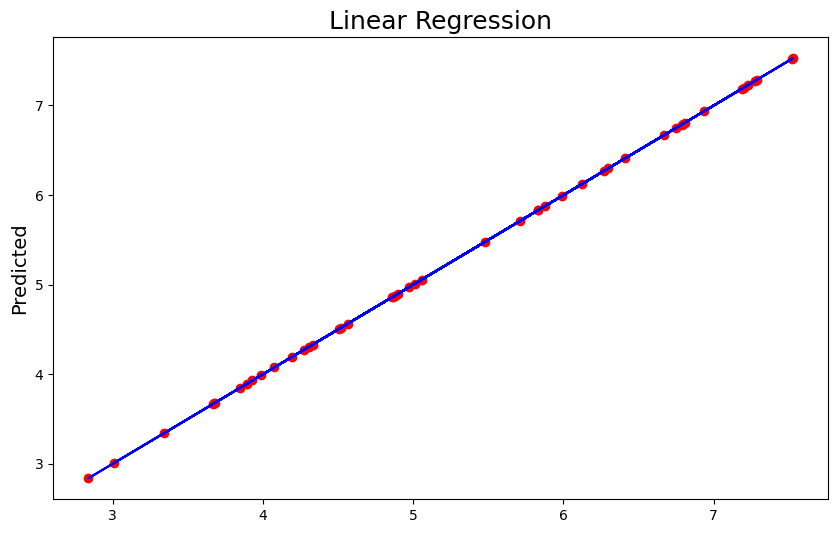

In [65]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_LR, y=y_test, color = 'r')
plt.plot(pred_LR,pred_LR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

In [66]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on training data:',r2_score(y_test,pred_RFR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 98.68952782175386
R2_score on training data: 0.8532575481356568
Mean Absolute Error: 0.4080787499999999
Mean Squared Error: 0.26449779619583297
Root Mean Squared Error: 0.5142934922744337


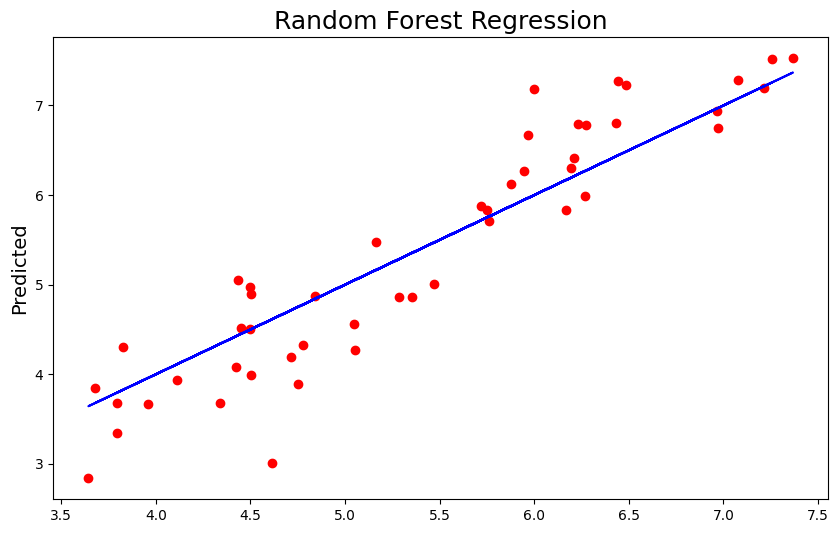

In [67]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_RFR, y=y_test, color = 'r')
plt.plot(pred_RFR,pred_RFR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Random Forest Regression', fontsize = 18)
plt.show()

In [68]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_knn))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 91.40110528708234
R2_score on test data: 0.8939841862731718
Mean Absolute Error: 0.34649999999999986
Mean Squared Error: 0.19108954999999994
Root Mean Squared Error: 0.4371379073015745


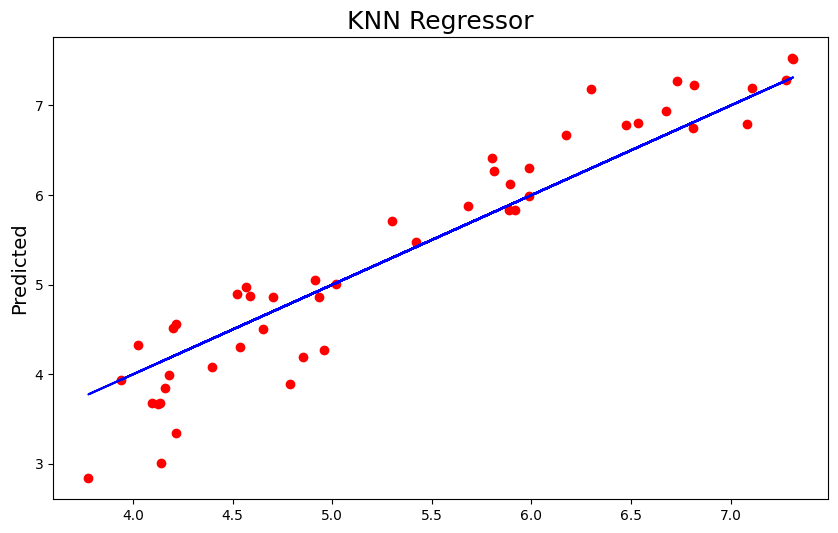

In [69]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_knn, y=y_test, color = 'r')
plt.plot(pred_knn,pred_knn,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('KNN Regressor', fontsize = 18)
plt.show()

In [70]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_GBR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 99.95350221725685
R2_score on test data: 0.9135546394405543
Mean Absolute Error: 0.3089787833940623
Mean Squared Error: 0.15581453811651494
Root Mean Squared Error: 0.39473350265275803


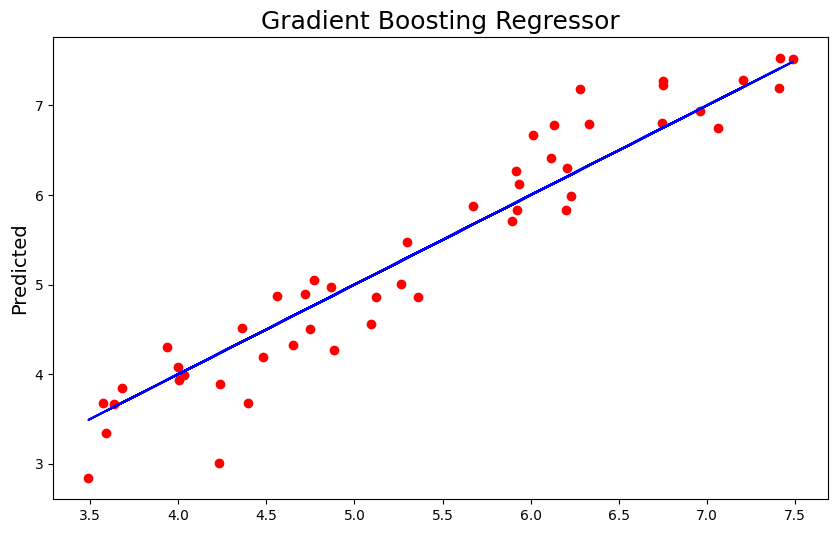

In [71]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_GBR, y=y_test, color = 'r')
plt.plot(pred_GBR,pred_GBR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Gradient Boosting Regressor', fontsize = 18)
plt.show()

In [72]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_svr))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 98.2846366371926
R2_score on test data: 0.8947350635514056
Mean Absolute Error: 0.2796643409903346
Mean Squared Error: 0.18973612171266305
Root Mean Squared Error: 0.43558710003013523


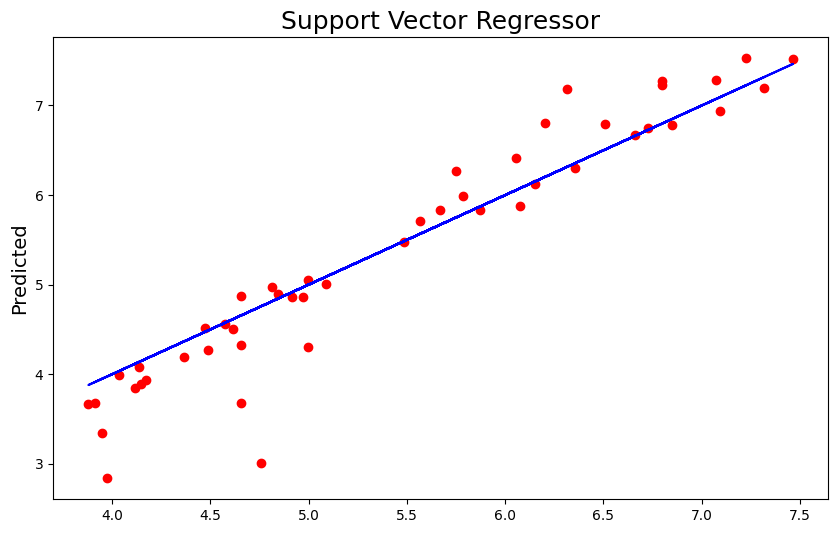

In [73]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_svr, y=y_test, color = 'r')
plt.plot(pred_svr,pred_svr,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Support Vector Regressor', fontsize = 18)
plt.show()

In [74]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR = ETR.predict(x_test)
pred_train = ETR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_ETR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2_score: 100.0
R2_score on test data: 0.8998466087360747
Mean Absolute Error: 0.3245825
Mean Squared Error: 0.1805227521708331
Root Mean Squared Error: 0.4248796914078538


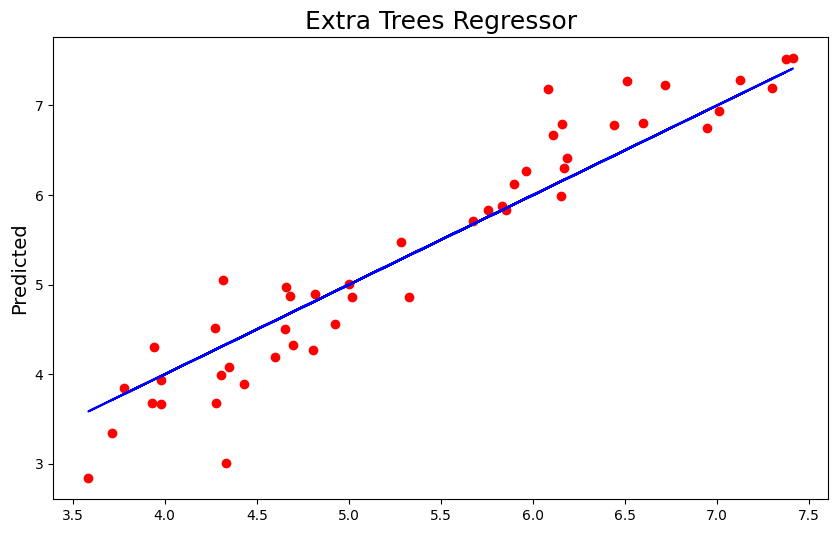

In [75]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_ETR, y=y_test, color = 'r')
plt.plot(pred_ETR,pred_ETR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Extra Trees Regressor', fontsize = 18)
plt.show()

### Cross Validation Score

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
score1 = cross_val_score(RFR,x,y)
print(score1)
print('RFR score:',score1.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[-6.94526117 -1.26325278 -0.72402449 -1.44880844 -5.4641609 ]
RFR score: -3.169101556541071
Difference between R2 score and cross validation is:  402.23591046767274


In [78]:
score2 = cross_val_score(knn,x,y)
print(score2)
print('KNN score:',score2.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_knn)-score2.mean())*100)

[-9.12505934 -2.54057731 -2.74178757 -5.33740155 -5.29181672]
KNN score: -5.007328497616674
Difference between R2 score and cross validation is:  590.1312683889846


In [79]:
score3 = cross_val_score(GBR,x,y)
print(score3)
print('GBR score:',score3.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[-3.73553245 -0.98785071 -1.24901031 -1.834522   -3.57143116]
GBR score: -2.2756693262629355
Difference between R2 score and cross validation is:  318.92239657034895


In [80]:
score4 = cross_val_score(svr,x,y)
print(score4)
print('SVR score:',score4.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_svr)-score4.mean())*100)

[-9.74629864e+00  6.77719009e-03  8.25199527e-01  3.44124295e-02
 -5.92769431e+00]
SVR score: -2.9615207611319576
Difference between R2 score and cross validation is:  385.62558246833635


In [81]:
score5 = cross_val_score(ETR,x,y)
print(score5)
print('ETR score:',score5.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_svr)-score5.mean())*100)

[-6.5940853  -0.32072349 -0.38635037 -1.24064197 -4.99131725]
ETR score: -2.70662367498493
Difference between R2 score and cross validation is:  360.1358738536336


In [82]:
score6 = cross_val_score(LR,x,y)
print(score6)
print('LR score:',score6.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_LR)-score6.mean())*100)

[0.99999945 0.99999834 0.99999836 0.99999535 0.99999943]
LR score: 0.9999981871007761
Difference between R2 score and cross validation is:  0.00017770027517238773


In [83]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Regressor',score4.mean()*100],['Extra Trees Regressor',score5.mean()*100],
              ['Gradient Boosting Regressor',score3.mean()*100],['Random Forest Regressor',score1.mean()*100],
              ['KNeighborsClassifier',score2.mean()*100],
              ['Linear Regression',score6.mean()*100]],columns=['Models','Accuracy'])

Models    Accuracy
0     Support Vector Regressor -296.152076
1        Extra Trees Regressor -270.662367
2  Gradient Boosting Regressor -227.566933
3      Random Forest Regressor -316.910156
4         KNeighborsClassifier -500.732850
5            Linear Regression   99.999819

The best model is Linear Regression model

### Final Model

In [85]:
Model = LinearRegression()

In [86]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)

print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.9999999641035279
Mean Absolute Error: 0.00021693029640854067
Mean Squared Error: 6.470205217593876e-08
Root Mean Squared Error: 0.0002543659807756115


In [87]:
import pickle
filename = 'World_Happiness_Analysis.pkl'
pickle.dump(Model,open(filename,'wb')) 

In [88]:
import pickle
loaded_model = pickle.load(open('World_Happiness_Analysis.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

99.9999964103528


In [89]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predcited','Original'])
conclusion

0         1        2         3         4         5   \
Predcited  4.194343  4.517817  6.81023  5.013094  4.507204  4.270664   
Original   4.194000  4.518000  6.81000  5.013000  4.507000  4.271000   

                 6         7        8         9   ...       38        39  \
Predcited  7.527017  6.786205  6.79777  4.897567  ...  7.27768  4.875949   
Original   7.527000  6.786000  6.79800  4.898000  ...  7.27800  4.876000   

                 40       41        42        43        44        45  \
Predcited  6.269213  5.47699  4.971114  7.522158  3.844981  6.411223   
Original   6.269000  5.47700  4.971000  7.522000  3.845000  6.411000   

                 46        47  
Predcited  6.122729  4.332155  
Original   6.123000  4.332000  

[2 rows x 48 columns]